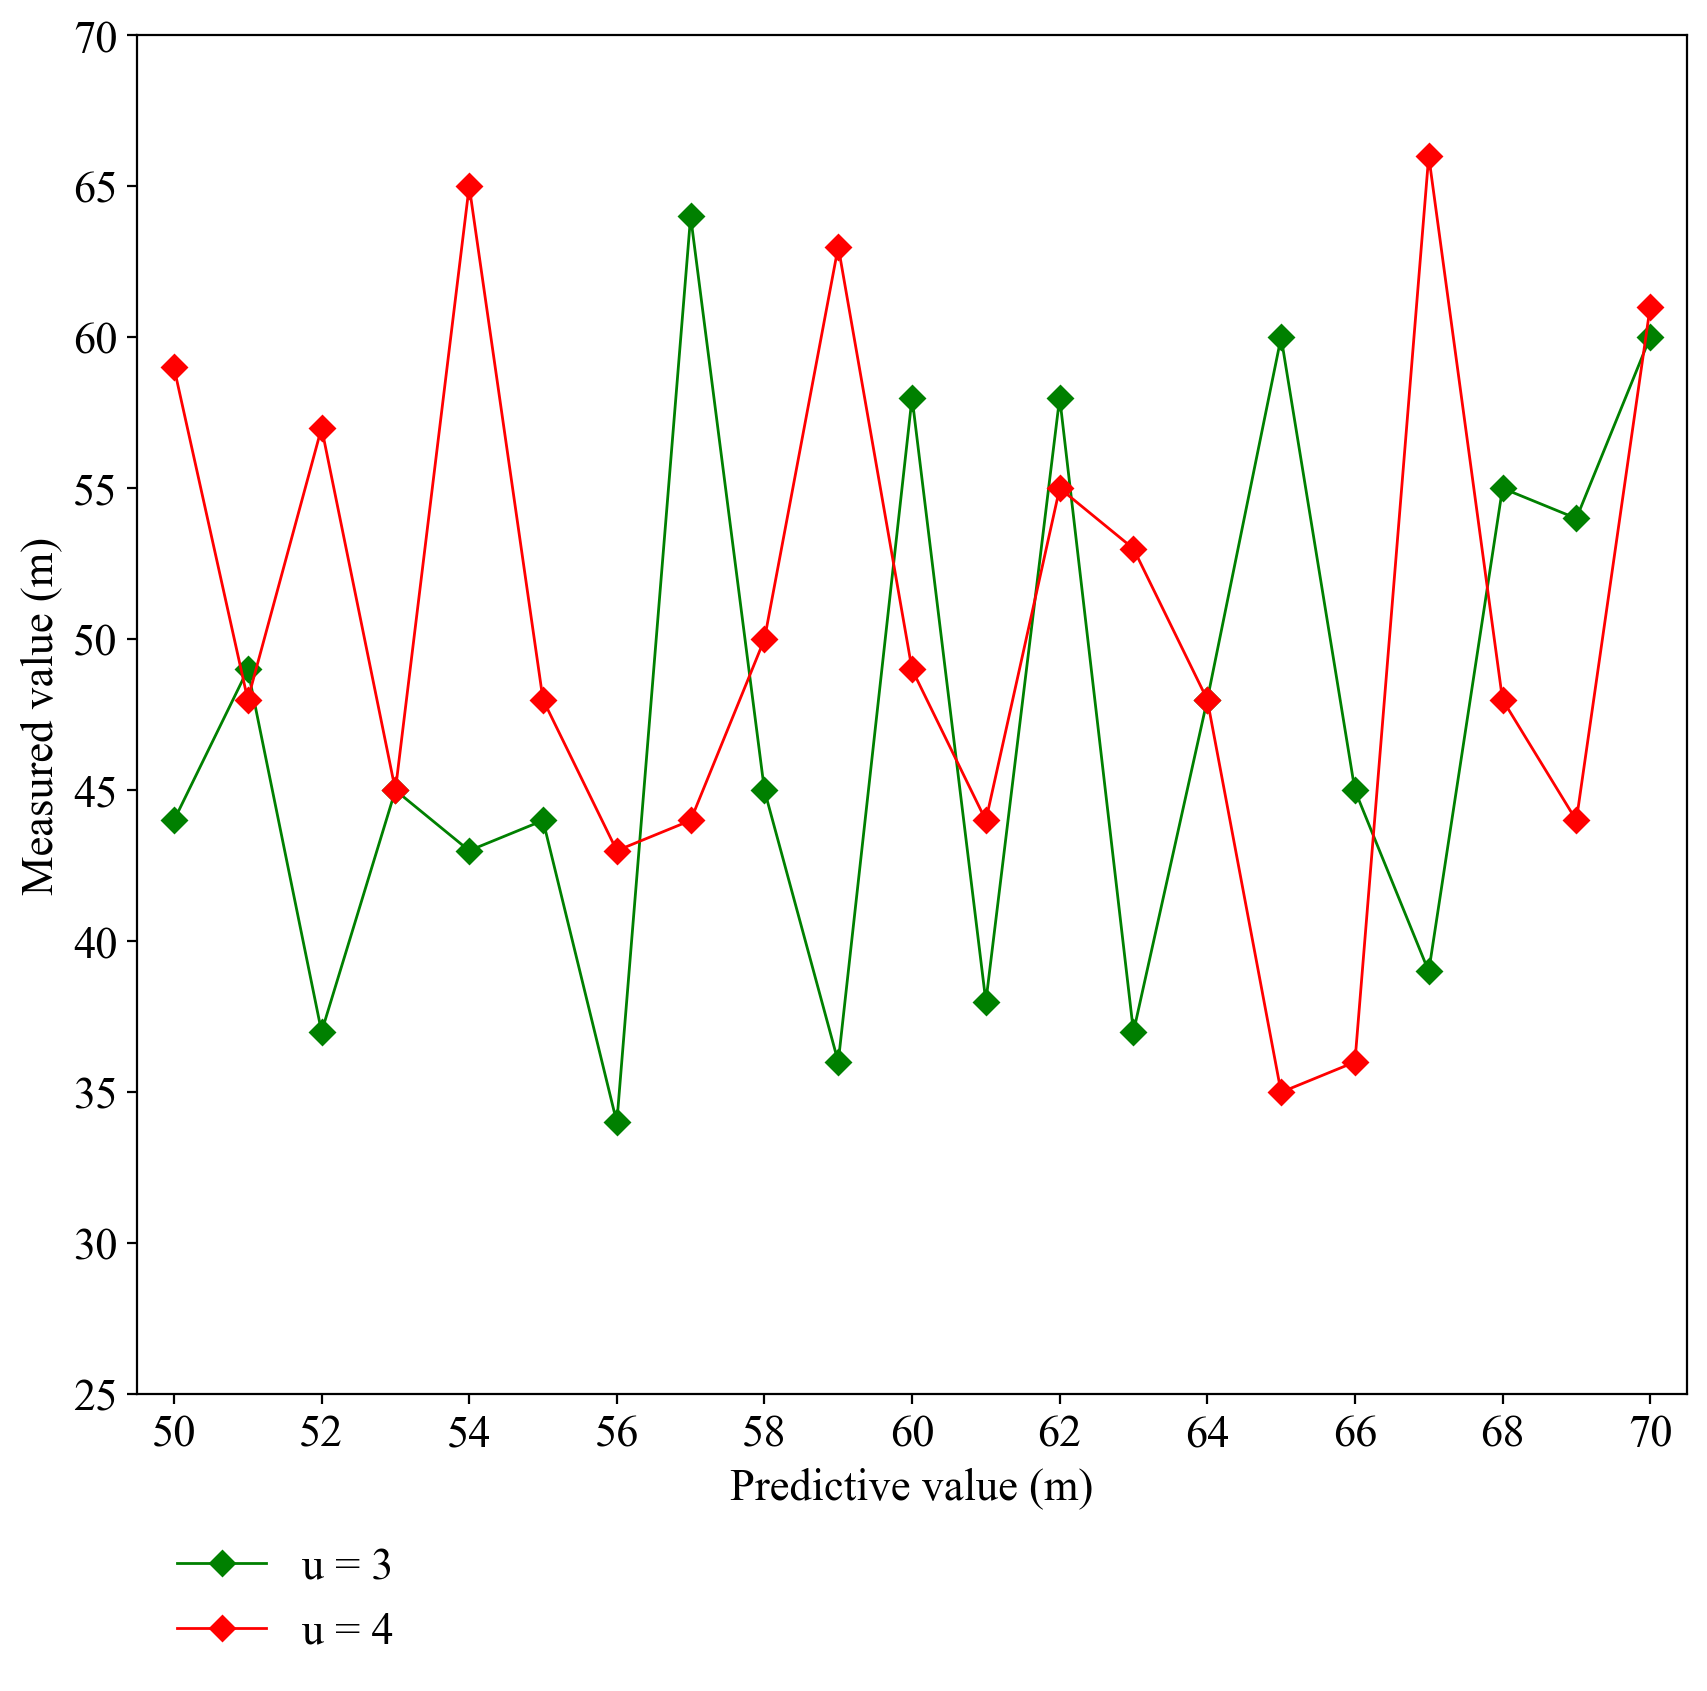

In [3]:
import matplotlib.pyplot as plt 
from matplotlib.pyplot import MultipleLocator

# 字体格式
config = {
    "font.family":'serif',
    "font.size": 16,
    'font.style':'normal',
    'font.weight':'normal',
    "mathtext.fontset":'cm',
    "font.serif": ['Times New Roman'],
    "axes.unicode_minus": False,
}
plt.rcParams.update(config)

u3_x=range(50,71) 
u3_y=[44,49,37,45,43,44,34,64,45,36,58,38,58,37,48,60,45,39,55,54,60] 
u4_x=range(50,71) 
u4_y=[59,48,57,45,65,48,43,44,50,63,49,44,55,53,48,35,36,66,48,44,61] 

plt.figure(figsize=(10, 9), dpi=200)
x_major_locator=MultipleLocator(2)
y_major_locator=MultipleLocator(5)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.plot(u3_x,u3_y,label='u = 3',linewidth=1, color='green', marker='D', markersize=6) 
plt.plot(u4_x,u4_y,label='u = 4',linewidth=1, color='red', marker='D', markersize=6) 
plt.xlabel('Predictive value (m)') 
plt.ylabel('Measured value (m)') 
plt.axis([49.5,70.5,25,70])
plt.legend(loc=3,bbox_to_anchor=(0,-0.22),frameon=False)
plt.show() 

**衰退因子**

$ W = \alpha*d^{-ku}+u/k + \varepsilon$

$ \alpha=0.6， k = 1，\varepsilon服从下表对应d的分布： $

| d | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 |
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|$\varepsilon$|0|0.430211|0.300124|0.200563|0.100278|0.060042|0.030086|0.020019|0.010045|0.006258|-0.005583|-0.005593|-0.005801|-0.006241|
| d | 15 | 16 | 17 | 18 | 19 | 20 | 21 | 22 | 23 | 24 | 25 | 26 | 27 | 28 |
|$\varepsilon$|-0.008119|-0.016237|-0.019347|-0.020067|-0.020935|-0.021559|-0.023122|-0.026291|-0.028590|-0.0292467|-0.031117|-0.033642|-0.036798|-0.037305|

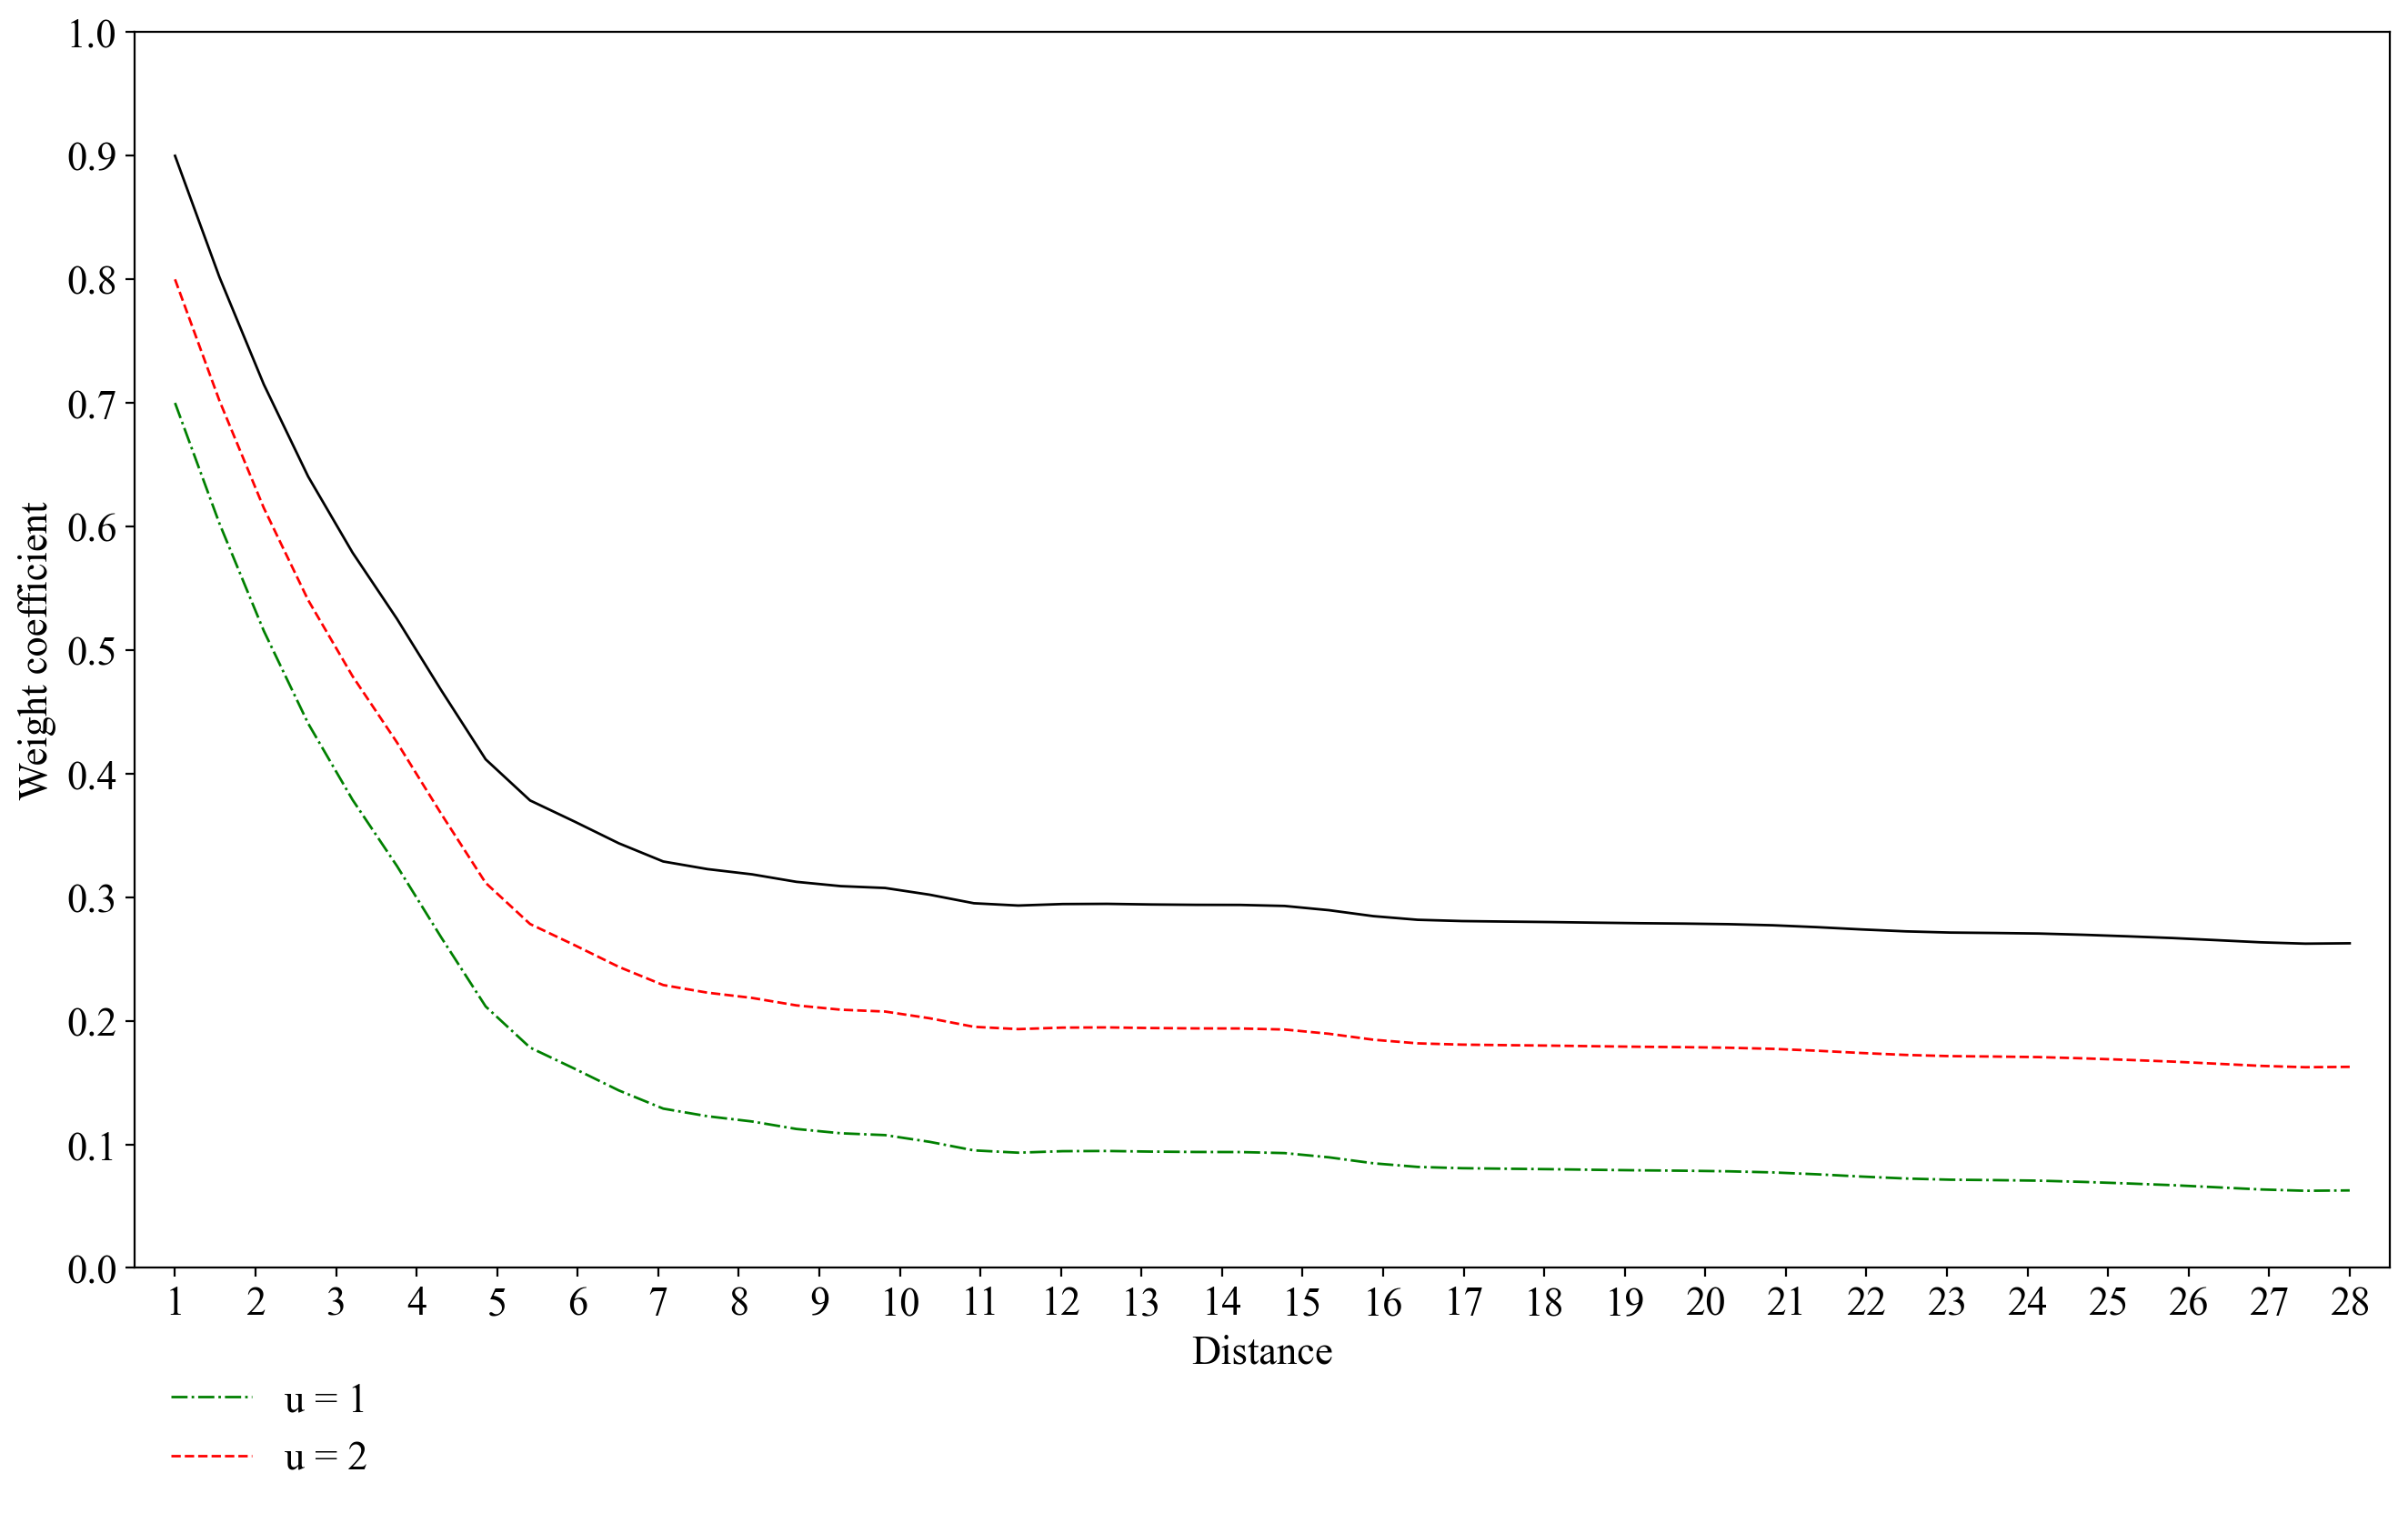

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import make_interp_spline
from matplotlib.pyplot import MultipleLocator

# 字体格式
config = {
    "font.family":'serif',
    "font.size": 16,
    'font.style':'normal',
    'font.weight':'normal',
    "mathtext.fontset":'cm',
    "font.serif": ['Times New Roman'],
    "axes.unicode_minus": False,
}
plt.rcParams.update(config)

# 系数
alpha = 0.6
beta = 0.001
k = 10.0
mu = 0
sigma = 0.002
d = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28])
e = np.array([0.0, 0.430211,0.300124,0.200563,0.100278,0.060042,0.030086,0.020019,0.010045,0.006258,-0.005583, -0.005593, -0.005801, -0.006241, -0.008119, -0.016237, -0.019347, -0.020067, -0.020935, 
              -0.021559, -0.023122, -0.026291, -0.028590, -0.0292467, -0.031117, -0.033642, -0.036798, -0.037305])
W_1 = []
W_2 = []
W_3 = []
for u in range(1,5):
    for i in range(d.size):
        if u == 1:
            W_1.append(alpha*d[i]**(-u*k) + (u/k) + e[i])
        if u == 2:
            W_2.append(alpha*d[i]**(-u*k) + (u/k) + e[i])            
        if u == 3:
            W_3.append(alpha*d[i]**(-u*k) + (u/k) + e[i])   
    
W_1 = np.array(W_1)
W_2 = np.array(W_2)
W_3 = np.array(W_3)
d_smooth = np.linspace(d.min(), d.max(), 50)
W_1_smooth = make_interp_spline(d, W_1)(d_smooth)
W_2_smooth = make_interp_spline(d, W_2)(d_smooth)
W_3_smooth = make_interp_spline(d, W_3)(d_smooth)
# 设置横轴轴比例，dpi每个间隔的像素点大小
plt.figure(figsize=(16, 9), dpi=200)
x_major_locator=MultipleLocator(1)
y_major_locator=MultipleLocator(0.1)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.xlabel('Distance')
plt.ylabel('Weight coefficient')
plt.axis([0.5,28.5,0.0,1.0])
plt.plot(d_smooth,W_1_smooth,label='u = 1',linewidth=1, color='green', linestyle='-.') 
plt.plot(d_smooth,W_2_smooth,label='u = 2',linewidth=1, color='red', linestyle='--') 
plt.plot(d_smooth,W_3_smooth,linewidth=1, color='black', linestyle='-') 
plt.legend(loc=3,bbox_to_anchor=(0,-0.2),frameon=False)
plt.show()

1 Inverse distance weighted interpolation

In [5]:
import numpy as np
import math
import random
from matplotlib import pyplot as plt
from scipy.interpolate import make_interp_spline
from matplotlib.pyplot import MultipleLocator
# 系数
alpha = 0.6
beta = 0.0015
k = 1
l = 1
u = 1
"""
1 1 2 1 1 1
2 2 2 2 2 1
2 2 1 2 2 1
2 2 2 2 2 1
1 1 2 1 1 1
"""
S = np.array([
    [0.30, 0.50, 0.40, 0.50, 0.60, 0.60, 0.50, 0.53, 0.56, 0.58, 0.59, 0.61, 0.62, 0.66, 0.88, 1.19, 1.68, 3.10, 4.10, 6.20],
    [0.35, 0.40, 0.50, 0.70, 0.65, 0.70, 0.85, 1.58, 1.59, 1.20, 0.61, 0.64, 0.64, 0.68, 0.87, 1.19, 1.69, 3.30, 4.50, 6.70],
    [0.40, 0.40, 0.43, 0.60, 0.71, 0.72, 1.52, 1.62, 1.61, 1.60, 0.60, 0.62, 0.64, 0.69, 0.91, 1.20, 1.72, 3.80, 4.70, 6.90],
    [0.50, 0.50, 0.40, 0.40, 0.65, 0.66, 0.67, 1.15, 1.25, 1.06, 0.77, 0.57, 0.62, 0.65, 0.86, 1.19, 1.73, 3.80, 4.90, 7.10],
    [0.40, 0.50, 0.40, 0.40, 0.44, 0.48, 0.50, 0.52, 0.53, 0.52, 0.51, 0.54, 0.60, 0.63, 0.85, 1.19, 1.75, 4.00, 5.20, 7.21]])

# 加载k分别为1,2,3,4的不同经验e
e = {}
e[1] = [0.0, 3.230346, 6.365597, 9.287162]
e[2] = [0.0, -3.511123, -2.150457, 0.765123]
e[3] = [0.0, -0.003001, -0.004572, 0.100655]
e[4] = [0.0, 4.431211, -39.770867, -18.548721]
e[10] = [0.0, 0.430211,0.300124,0.200563,0.100278,0.060042,0.030086,0.020019,0.010045,0.006258,-0.005583, -0.005593, -0.005801, -0.006241, -0.008119, -0.016237, -0.019347, -0.020067, -0.020935, 
              -0.021559, -0.023122, -0.026291, -0.028590, -0.0292467, -0.031117, -0.033642, -0.036798, -0.037305]
# 通过下标计算两点的距离，选点的方式为固定的16个点：(-2,0),(-1,-2~2),(0,-2~2),(1,-2~2),(2,0)
loc = np.array([[-2,0],[-1,-2],[-1,-1],[-1,0],[-1,1],[-1,2],[0,-2],[0,-1],[0,1],[0,2],[1,-2],[1,-1],[1,0],[1,1],[1,2],[2,0]])
# 距离数组
d = []
for i in range(loc.shape[0]):
    d.append(math.sqrt((loc[i][0])**2 + (loc[i][1])**2)*l)
d = np.array(d)
# print(d)
# 计算权重
print("[Inverse distance weighted]")
# 设定距离大于30的权重系数计算公式如为：w = alpha*d[i]**(-u*k) + (u/k) + e
for k in range(1,5):
    w = []
    for i in range(d.size):
        floor = math.floor(d[i])
        wi = alpha*d[i]**(-u*k) + (u/k) + e[k][floor-1] + (d[i]-floor)*(e[k][floor]-e[k][floor-1]) #加e项，小数的时候按比例折算
        w.append(wi)
    
    # print(e)    
    w = np.array(w/sum(w))
    # print("k = ",k)
    # print(w)
    # 记录所有采样点
    SP = []
    # 取Si从第3行第3列开始向右取点p，p点的下标的范围为(2,2~17)
    row = 2
    cols = np.arange(2,18,1)
    delta = [] #记录残差
    for col in range(2,18):
        # row, col对应的p
        Si = []
        for i in range(d.size):
            Si.append(S[row+loc[i][0]][col+loc[i][1]])
        Si = np.array(Si)
        # 计算Z(p)，加权求和
        Zp_ = w.dot(Si.T)
        Zp = S[row][col]
        #print(Zp, Zp_)
        delta.append(Zp - Zp_) #残差
        
    delta = np.array(delta)
    # 计算Q
    Q = sum(delta**2) /cols.size
    p = sum(delta) / cols.size
    error = math.sqrt(sum(abs(delta - p)**2)/(cols.size-1))
    print("K=",k ,",Q=", Q,",Residual=",p,"Error=", error)

[Inverse distance weighted]
K= 1 ,Q= 0.16239327808561133 ,Residual= 0.023792609423977623 Error= 0.4154704190961173
K= 2 ,Q= 0.25756365219584504 ,Residual= 0.00977642807017734 Error= 0.5240540161981103
K= 3 ,Q= 0.10362669296641243 ,Residual= 0.04593422720036702 Error= 0.329066136797927
K= 4 ,Q= 0.4366329251090696 ,Residual= 0.4657204846563362 Error= 0.4841348079814541


2 Kriging interpolation

In [6]:
from pykrige.ok import OrdinaryKriging
import numpy as np
from matplotlib import pyplot as plt

# 已知采样点的数据，是坐标（x，y）和坐标对应的值
# 矩阵中第一列是x,第二列是y,第三列是坐标对应的值
mea_data = np.array([
    [2,2,0.43], [2,3,0.60], [2,4,0.71], [2,5,0.72], [2,6,1.52], [2,7,1.62], [2,8,1.61], [2,9,1.60], [2,10,0.60], [2,11,0.62], [2,12,0.64], [2,13,0.69], [2,14,0.91], [2,15,1.20], [2,16,1.72], [2,17,3.80]])
data = np.array([
    [0,0,0.30], [0,1,0.50], [0,2,0.40], [0,3,0.50], [0,4,0.60], [0,5,0.60], [0,6,0.50], [0,7,0.53], [0,8,0.56], [0,9,0.58], [0,10,0.59], [0,11,0.61], [0,12,0.62], [0,13,0.66], [0,14,0.88], [0,15,1.19], [0,16,1.68], [0,17,3.10], [0,18,4.10], [0,19,6.20],
    [1,0,0.35], [1,1,0.40], [1,2,0.50], [1,3,0.70], [1,4,0.65], [1,5,0.70], [1,6,0.85], [1,7,1.58], [1,8,1.59], [1,9,1.20], [1,10,0.61], [1,11,0.64], [1,12,0.64], [1,13,0.68], [1,14,0.87], [1,15,1.19], [1,16,1.69], [1,17,3.30], [1,18,4.50], [1,19,6.70],
    [2,0,0.40], [2,1,0.40], [2,18,4.70], [2,19,6.90],
    [3,0,0.50], [3,1,0.50], [3,2,0.40], [3,3,0.40], [3,4,0.65], [3,5,0.66], [3,6,0.67], [3,7,1.15], [3,8,1.25], [3,9,1.06], [3,10,0.77], [3,11,0.57], [3,12,0.62], [3,13,0.65], [3,14,0.86], [3,15,1.19], [3,16,1.73], [3,17,3.80], [3,18,4.90], [3,19,7.10],
    [4,0,0.40], [4,1,0.50], [4,2,0.40], [4,3,0.40], [4,4,0.44], [4,5,0.48], [4,6,0.50], [4,7,0.52], [4,8,0.53], [4,9,0.52], [4,10,0.51], [4,11,0.54], [4,12,0.60], [4,13,0.63], [4,14,0.85], [4,15,1.19], [4,16,1.75], [4,17,4.00], [4,18,5.20], [4,19,7.21]])

# 网格
x_range = 5
y_range = 20
range_step = 1
gridx = np.arange(0.0, x_range, range_step) #三个参数的意思：范围0.0 - 0.6 ，每隔0.1划分一个网格
gridy = np.arange(0.0, y_range, range_step)
# variogram_model是变差函数模型，
# pykrige提供 linear, power, gaussian, spherical, exponential, hole-effect几种variogram_model可供选择，默认的为linear模型。
# 使用不同的variogram_model，预测效果是不一样的，应该针对自己的任务选择合适的variogram_model。
ok3d = OrdinaryKriging(data[:, 0], data[:, 1], data[:, 2], variogram_model="power") # 模型
k3d1, ss3d = ok3d.execute("grid", gridx, gridy) # k3d1是结果，给出了每个网格点处对应的值
pred = (np.round(k3d1, 2).T)[2,2:18] #预测的结果
mead = mea_data[:,2].T #实际值
delta = mead - pred
# 计算Q
Q = sum(delta**2) /pred.size
p = sum(delta) / pred.size
error = math.sqrt(sum(abs(delta - p)**2)/(pred.size-1))
print("[Kriging] Q=", Q, ",Residual=",p,",Error=", error)

[Kriging] Q= 0.8234375 ,Residual= -0.23625000000000004 ,Error= 0.9048747611318005


3 Nearest neighbor interpolation

In [7]:
import numpy as np
import math
import random

random.seed(2022)
S = np.array([
    [0.30, 0.50, 0.40, 0.50, 0.60, 0.60, 0.50, 0.53, 0.56, 0.58, 0.59, 0.61, 0.62, 0.66, 0.88, 1.19, 1.68, 3.10, 4.10, 6.20],
    [0.35, 0.40, 0.50, 0.70, 0.65, 0.70, 0.85, 1.58, 1.59, 1.20, 0.61, 0.64, 0.64, 0.68, 0.87, 1.19, 1.69, 3.30, 4.50, 6.70],
    [0.40, 0.40, 0.43, 0.60, 0.71, 0.72, 1.52, 1.62, 1.61, 1.60, 0.60, 0.62, 0.64, 0.69, 0.91, 1.20, 1.72, 3.80, 4.70, 6.90],
    [0.50, 0.50, 0.40, 0.40, 0.65, 0.66, 0.67, 1.15, 1.25, 1.06, 0.77, 0.57, 0.62, 0.65, 0.86, 1.19, 1.73, 3.80, 4.90, 7.10],
    [0.40, 0.50, 0.40, 0.40, 0.44, 0.48, 0.50, 0.52, 0.53, 0.52, 0.51, 0.54, 0.60, 0.63, 0.85, 1.19, 1.75, 4.00, 5.20, 7.21]])

# 最近邻插值，即寻找最邻近的值作为它的值
loc = np.array([[-1,0],[1,0],[0,1],[0,-1]])
# 取Si从第3行第3列开始向右取点p，p点的下标的范围为(2,2~17)
row = 2
cols = np.arange(2,18,1)
delta = [] #记录残差
for col in range(2,18):
    i = round(random.uniform(0,3))
    Zp_ = S[row+loc[i][0]][col+loc[i][1]]
    Zp = S[row][col]
    # print(Zp, Zp_)
    delta.append(Zp - Zp_) #残差
    
delta = np.array(delta)
# 计算Q
Q = sum(delta**2) /cols.size
p = sum(delta) / cols.size
error = math.sqrt(sum(abs(delta - p)**2)/(cols.size-1))
print("[Nearest neighbor] Q=", Q,",Residual=",p,"Error=", error)

[Nearest neighbor] Q= 0.38489375000000003 ,Residual= -0.05812500000000001 Error= 0.6379260014557592


**The scatter relationship between the actual measured value and the predicted value of the sampling point**

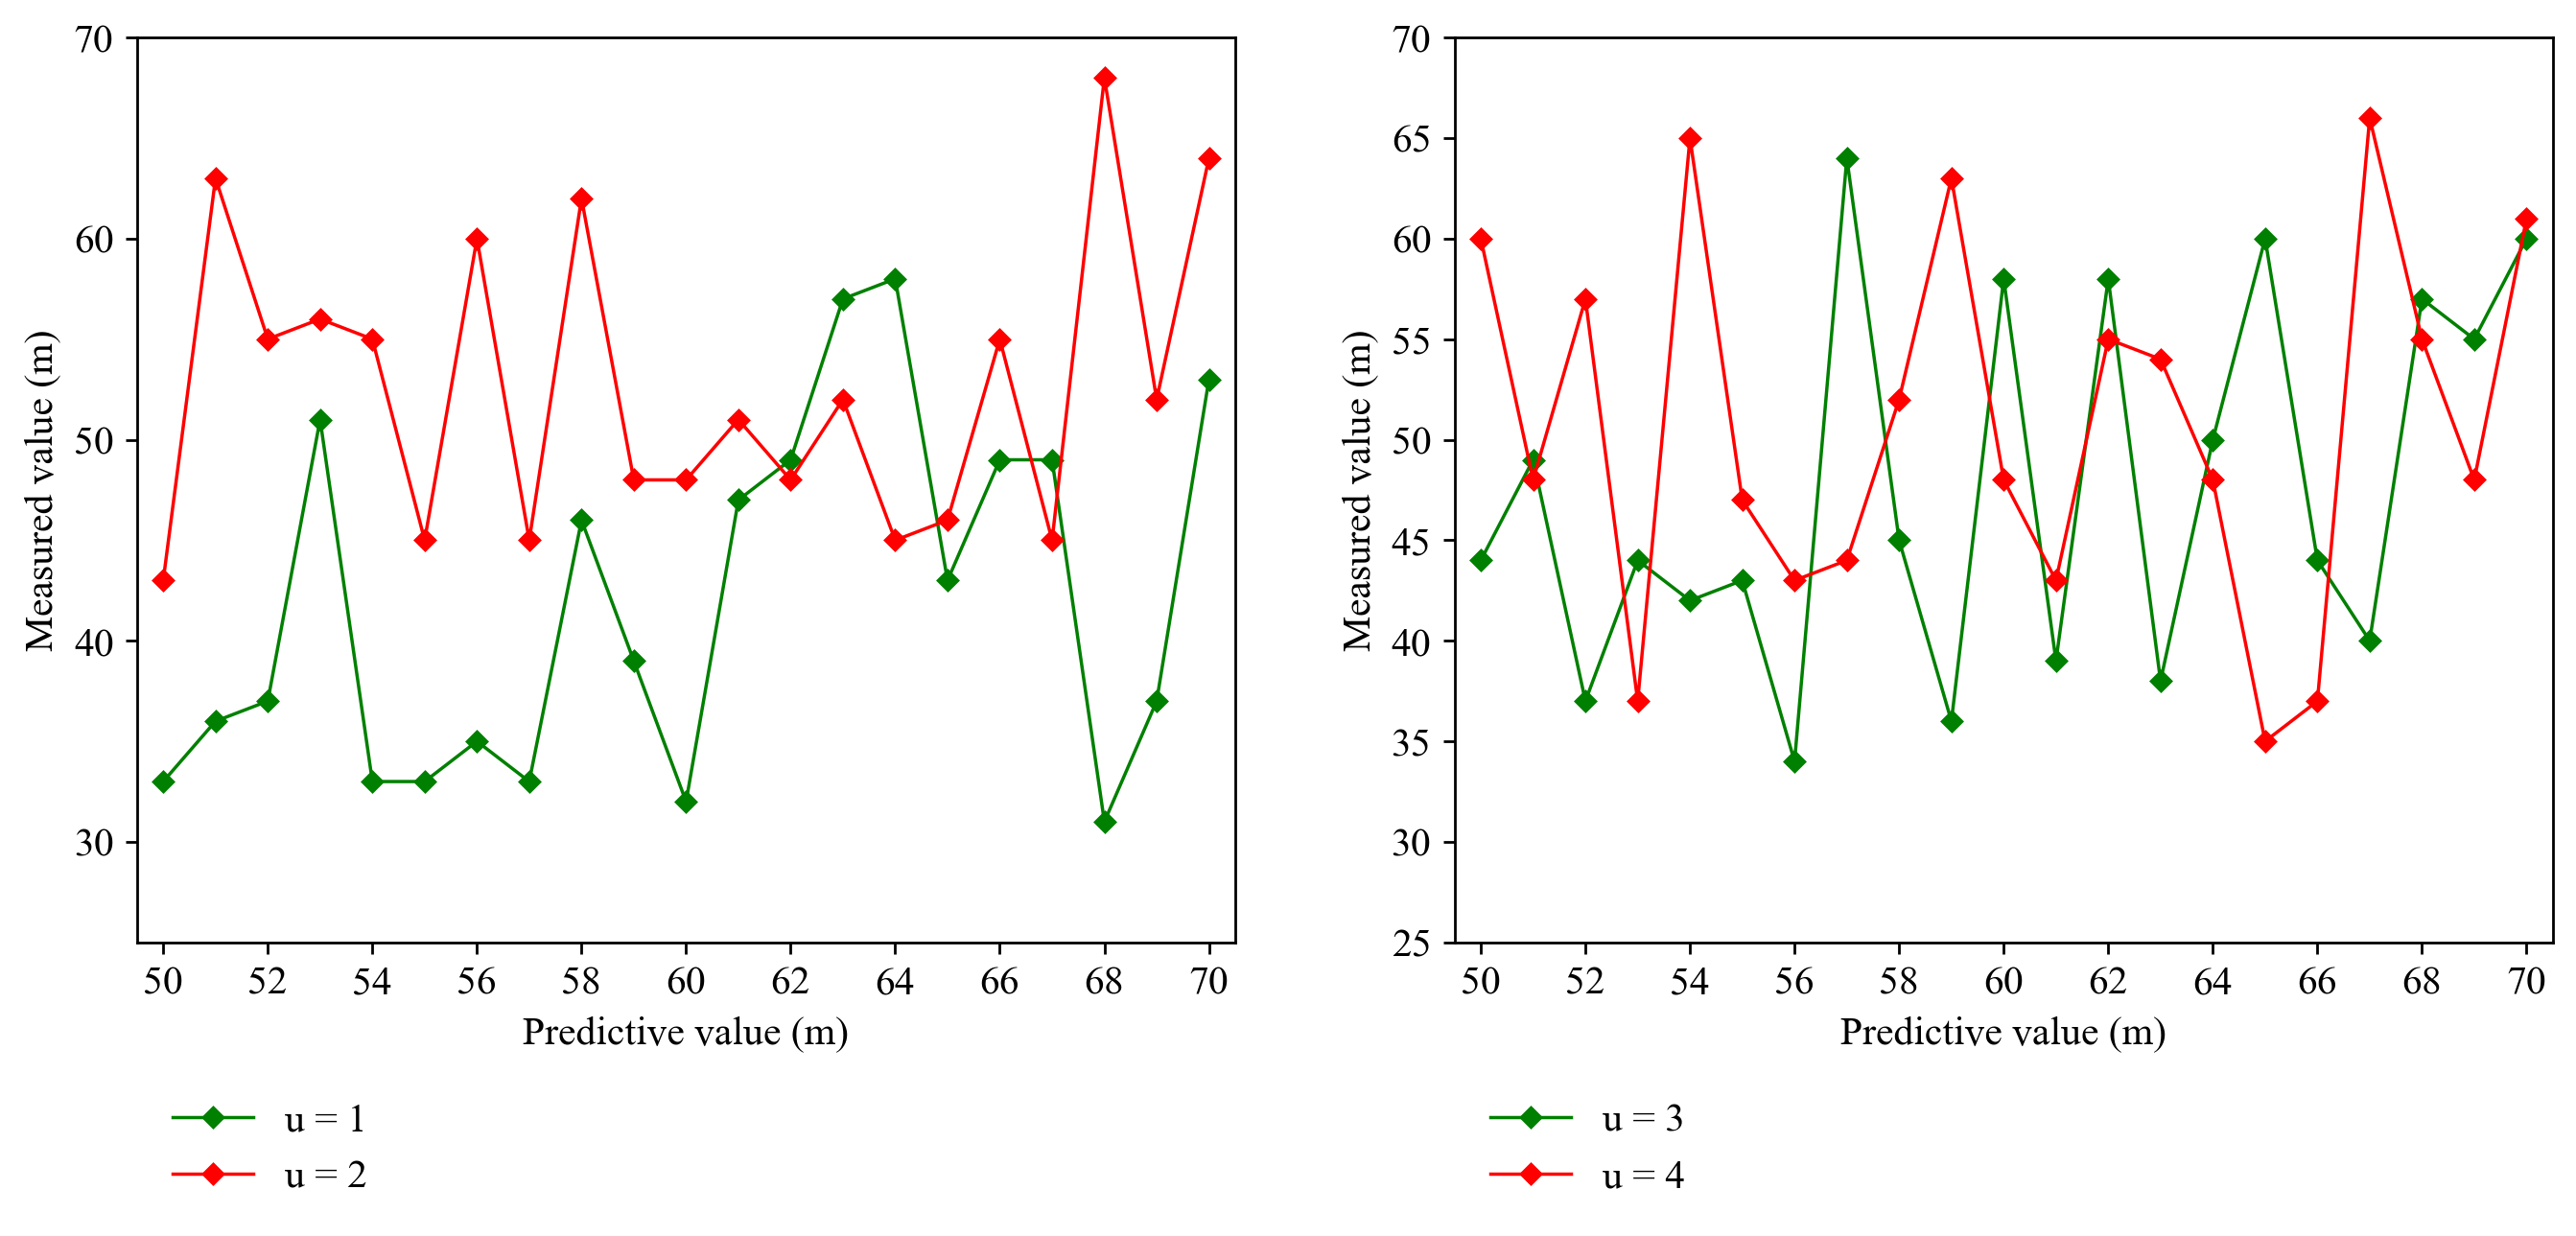

In [8]:
import numpy as np
import math
import matplotlib.pyplot as plt 
from matplotlib.pyplot import MultipleLocator

# 字体格式
config = {
    "font.family":'serif',
    "font.size": 12,
    'font.style':'normal',
    'font.weight':'normal',
    "mathtext.fontset":'cm',
    "font.serif": ['Times New Roman'],
    "axes.unicode_minus": False,
}
plt.rcParams.update(config)

# 以采样点为4个点的预测为例
"""
1 2 1
2 1 0 2
1 2 1
"""
# 加载k分别为1,2,3,4的不同经验e
e = {}
e[1] = [0.0, 3.230346, 6.365597, 9.287162]
e[2] = [0.0, -3.511123, -2.150457, 0.765123]
e[3] = [0.0, -0.003001, -0.004572, 0.100655]
e[4] = [0.0, 4.431211, -39.770867, -8.100655]
d = np.array([1,1,1,2])
k = 3.0
l = 30
#记录所有位置
S = {}
# 前4个值为周边4个采样点的高度，第5个为测量值
S[1] = np.array([
    [49,52,51,48],[47,58,50,48],[49,58,51,48],[52,58,51,50],[53,60,51,51],
    [49,65,53,51],[63,58,51,48],[65,58,51,53],[53,66,55,60],[66,58,56,53],
    [62,58,55,70],[66,58,57,65],[66,58,58,69],[65,62,59,71],[67,62,61,71],
    [65,62,65,71],[67,63,66,73],[67,67,66,71],[65,65,73,71],[65,71,70,71],
    [68,70,72,71]])
S[2] = np.array([
    [48,53,51,47],[46,58,51,48],[49,58,51,48],[53,58,51,48],[51,59,55,49],
    [49,56,64,49],[52,58,62,48],[54,58,55,66],[67,58,52,53],[59,62,57,58],
    [65,58,55,63],[64,63,59,58],[66,58,58,70],[66,60,59,72],[65,64,59,71],
    [66,62,64,71],[67,62,65,73],[65,67,66,73],[65,72,66,71],[65,70,72,71],
    [67,70,72,71]])
S[3] = np.array([
    [49,58,46,45],[49,55,51,48],[49,58,51,48],[49,57,54,51],[55,58,51,50],
    [49,66,51,52],[64,58,51,48],[52,70,53,50],[53,68,56,53],[63,58,53,63],
    [70,58,51,63],[68,58,61,56],[66,60,59,64],[66,58,59,72],[65,64,59,71],
    [65,65,61,71],[67,62,66,73],[67,63,68,73],[72,65,66,71],[65,69,73,71],
    [66,72,72,71]])
S[4] = np.array([
    [47,60,44,48],[49,56,51,48],[49,58,51,48],[52,57,54,48],[50,60,55,49],
    [49,55,65,49],[65,58,51,48],[55,56,63,52],[70,58,51,52],[60,58,55,65],
    [69,58,51,65],[59,61,60,67],[66,59,59,65],[66,58,59,72],[65,62,61,71],
    [67,62,61,73],[67,66,61,73],[67,65,66,73],[66,70,66,72],[68,65,73,71],
    [65,73,72,71]])
# u = 1时预测值分别为50-70的位置信息
w = {}
for u in range(1,5):
    wu = []
    for i in range(d.size):
        floor = math.floor(d[i])
        wi = alpha*d[i]**(-u*k) + (u/k) + e[k][floor-1] + (d[i]-floor)*(e[k][floor]-e[k][floor-1]) #加e项，小数的时候按比例折算
        wu.append(wi)
    wu = np.array(wu)
    w[u] = np.array(wu/sum(wu))
# 此时u不同，权重系数不一样
# print(w)
M = {}
M[1] = np.array([33,36,37,51,33,33,35,33,46,39,32,47,49,57,58,43,49,49,31,37,53])
M[2] = np.array([43,63,55,56,55,45,60,45,62,48,48,51,48,52,45,46,55,45,68,52,64])
M[3] = np.array([44,49,37,44,42,43,34,64,45,36,58,39,58,38,50,60,44,40,57,55,60])
M[4] = np.array([60,48,57,37,65,47,43,44,52,63,48,43,55,54,48,35,37,66,55,48,61])

Zp = {}
for u in range(1,5):
    Zp_u = []
    for i in range(21): 
        Zp_ = w[u].dot(S[u][i].T)
        Zp_u.append(round(Zp_)) #四舍五入取整
    Zp[u] = np.array(Zp_u)
# print(Zp)
# 画图
pred = np.arange(50,71)
# 设置横轴轴比例，dpi每个间隔的像素点大小
plt.figure(figsize=(13, 5), dpi=250)
# 第一个图
plt.subplot(121)
x_major_locator=MultipleLocator(2)
#把x轴的刻度间隔设置为1，并存在变量里
y_major_locator=MultipleLocator(10)
#把y轴的刻度间隔设置为10，并存在变量里
ax=plt.gca()
#ax为两条坐标轴的实例
ax.xaxis.set_major_locator(x_major_locator)
#把x轴的主刻度设置为1的倍数
ax.yaxis.set_major_locator(y_major_locator)
#把y轴的主刻度设置为10的倍数
plt.xlabel('Predictive value (m)') 
plt.ylabel('Measured value (m)') 
plt.axis([49.5,70.5,25,70])
plt.plot(pred,M[1],label='u = 1',linewidth=1, color='green', marker='D', markersize=4) 
plt.plot(pred,M[2],label='u = 2',linewidth=1, color='red', marker='D', markersize=4) 
plt.legend(loc=3, bbox_to_anchor=(0,-0.32), frameon=False)
# 第二个图
plt.subplot(122)
x_major_locator=MultipleLocator(2)
#把x轴的刻度间隔设置为1，并存在变量里
y_major_locator=MultipleLocator(5)
#把y轴的刻度间隔设置为10，并存在变量里
ax=plt.gca()
#ax为两条坐标轴的实例
ax.xaxis.set_major_locator(x_major_locator)
#把x轴的主刻度设置为1的倍数
ax.yaxis.set_major_locator(y_major_locator)
#把y轴的主刻度设置为10的倍数
plt.xlabel('Predictive value (m)') 
plt.ylabel('Measured value (m)') 
plt.axis([49.5,70.5,25,70])
plt.plot(pred,M[3],label='u = 3',linewidth=1, color='green', marker='D', markersize=4) 
plt.plot(pred,M[4],label='u = 4',linewidth=1, color='red', marker='D', markersize=4) 
plt.legend(loc=3, bbox_to_anchor=(0,-0.32), frameon=False)
plt.show() 

**Comparison of residual errors in various situations**

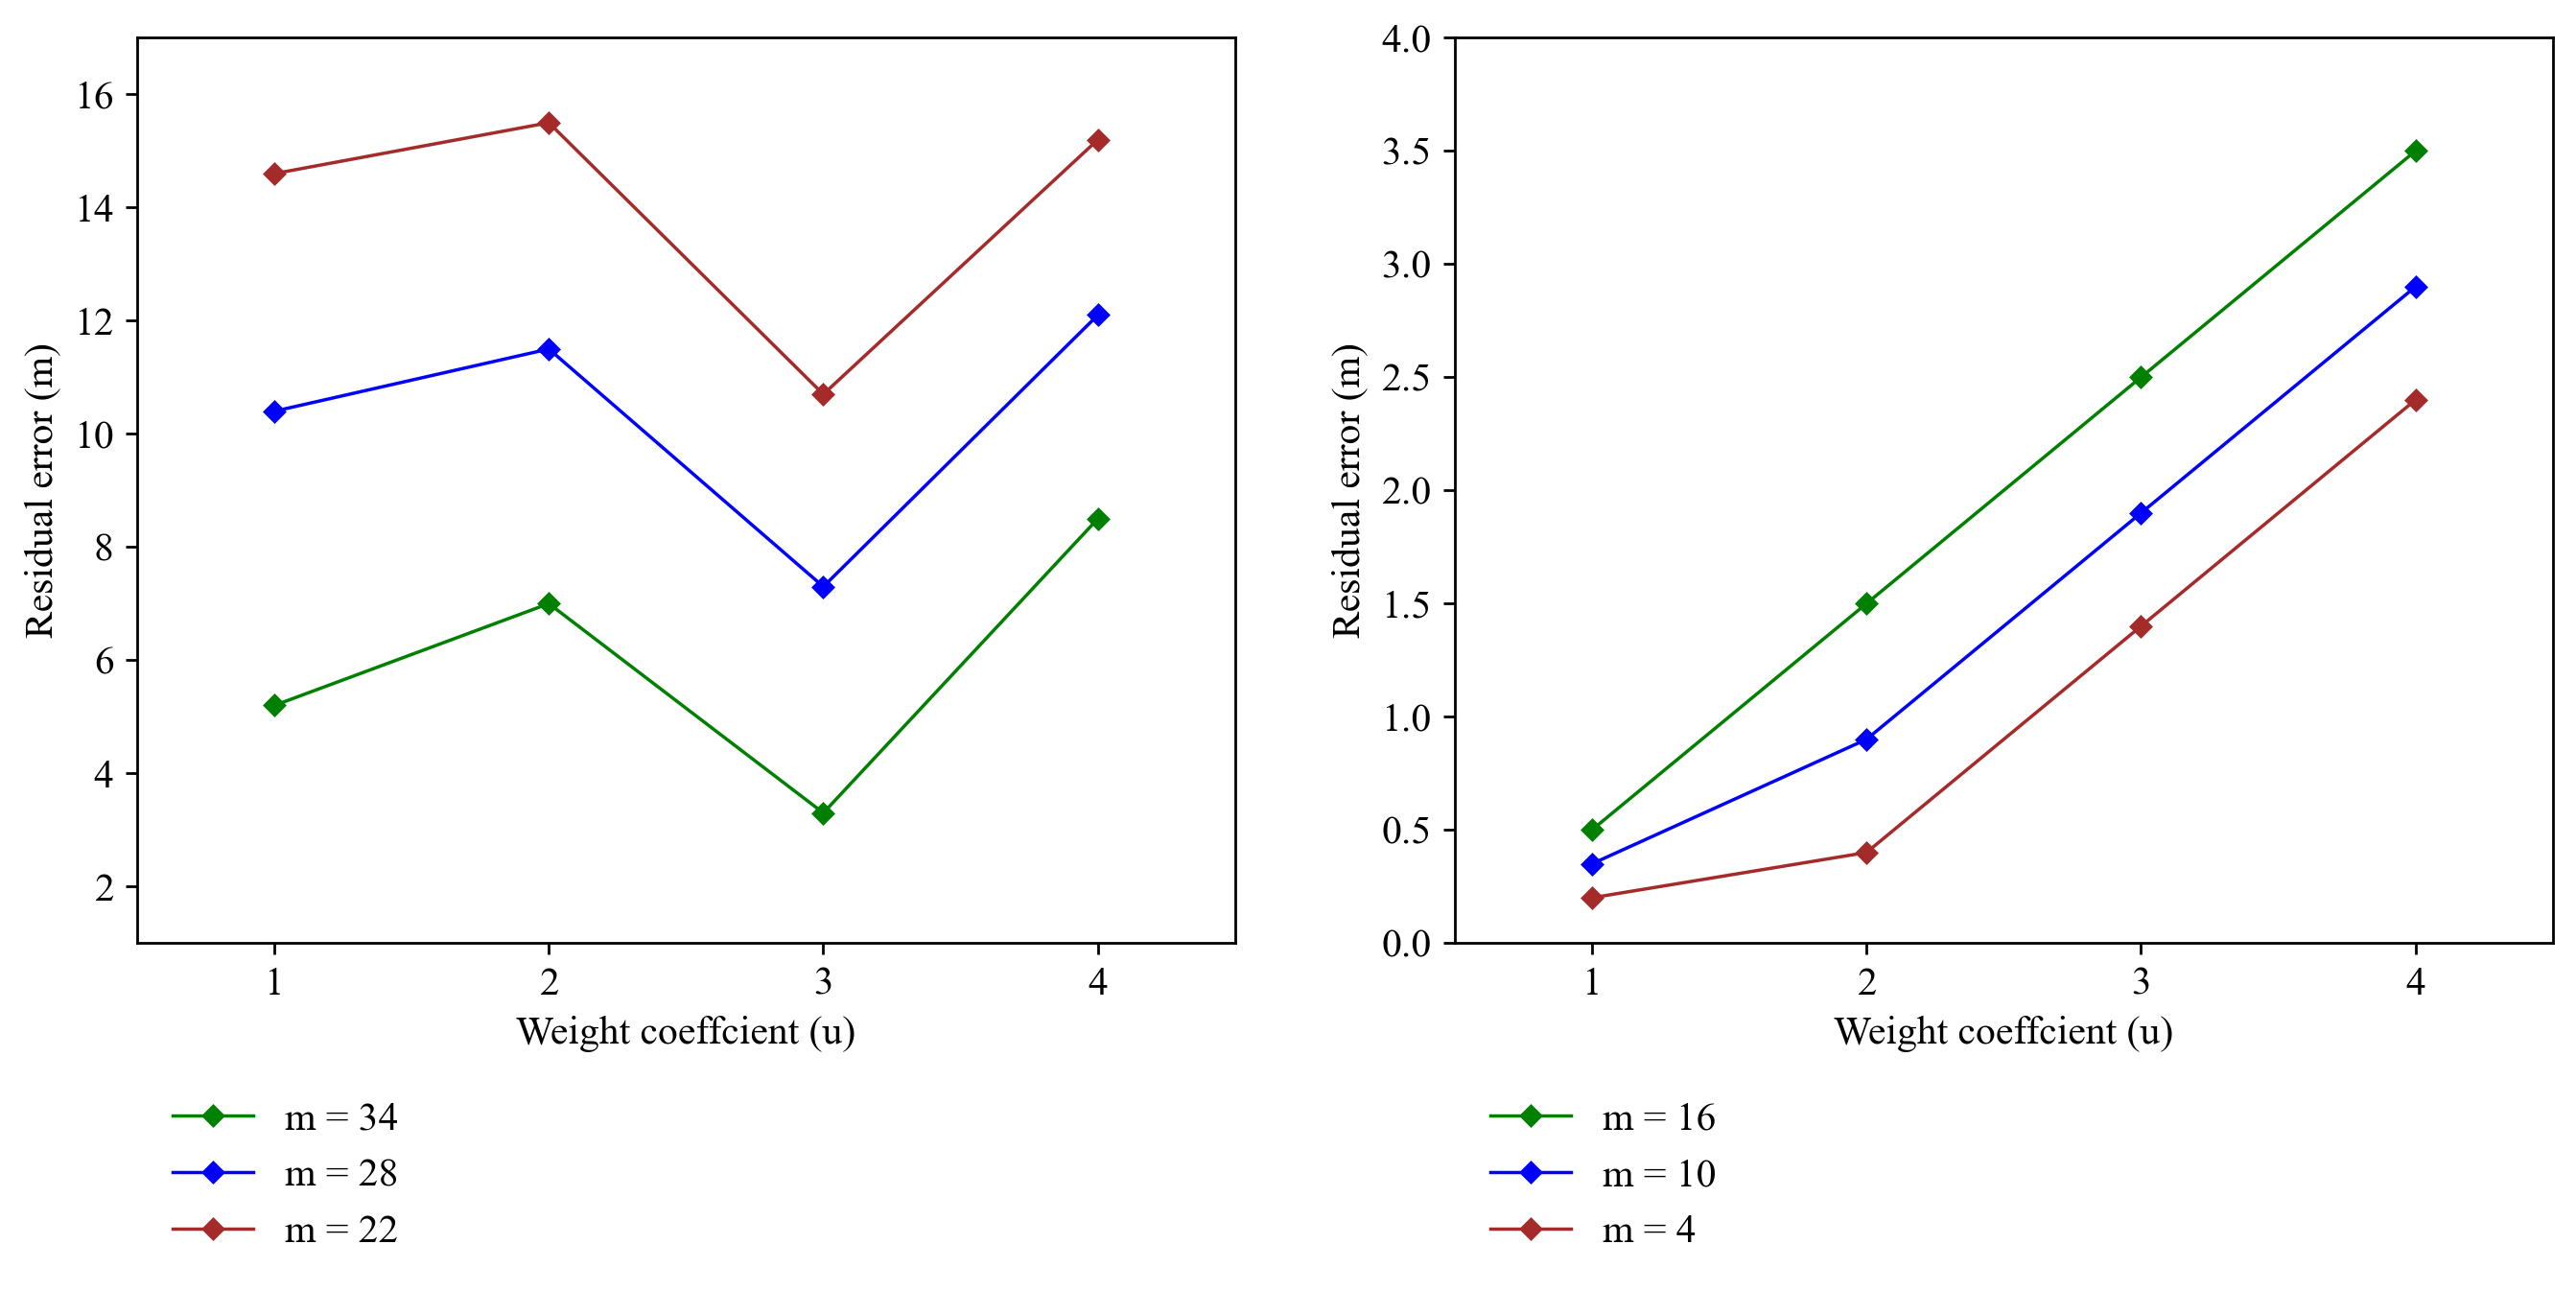

In [9]:
import numpy as np
import math
import matplotlib.pyplot as plt 
from matplotlib.pyplot import MultipleLocator

# 字体格式
config = {
    "font.family":'serif',
    "font.size": 12,
    'font.style':'normal',
    'font.weight':'normal',
    "mathtext.fontset":'cm',
    "font.serif": ['Times New Roman'],
    "axes.unicode_minus": False,
}
plt.rcParams.update(config)
u = np.array([1,2,3,4])
# load RE data
RE_m4 = np.array([0.02,0.04,0.14,0.24])
RE_m10 = np.array([0.035,0.09,0.19,0.29])
RE_m16 = np.array([0.05,0.15,0.25,0.35])
RE_m22 = np.array([1.46,1.55,1.07,1.52])
RE_m28 = np.array([1.04,1.15,0.73,1.21])
RE_m34 = np.array([0.52,0.7,0.33,0.85])

# 画图
# 设置横轴轴比例，dpi每个间隔的像素点大小
plt.figure(figsize=(13, 5), dpi=250)
# 第一个图
plt.subplot(121)
x_major_locator=MultipleLocator(1)
#把x轴的刻度间隔设置为1，并存在变量里
y_major_locator=MultipleLocator(2)
#把y轴的刻度间隔设置为10，并存在变量里
ax=plt.gca()
#ax为两条坐标轴的实例
ax.xaxis.set_major_locator(x_major_locator)
#把x轴的主刻度设置为1的倍数
ax.yaxis.set_major_locator(y_major_locator)
#把y轴的主刻度设置为10的倍数
plt.xlabel('Weight coeffcient (u)') 
plt.ylabel('Residual error (m)') 
plt.axis([0.5,4.5,1,17])
plt.plot(u,RE_m34*10,label='m = 34',linewidth=1, color='green', marker='D', markersize=4) 
plt.plot(u,RE_m28*10,label='m = 28',linewidth=1, color='blue', marker='D', markersize=4) 
plt.plot(u,RE_m22*10,label='m = 22',linewidth=1, color='brown', marker='D', markersize=4) 
plt.legend(loc=3, bbox_to_anchor=(0,-0.38), frameon=False)
# 第二个图
plt.subplot(122)
x_major_locator=MultipleLocator(1)
#把x轴的刻度间隔设置为1，并存在变量里
y_major_locator=MultipleLocator(0.5)
#把y轴的刻度间隔设置为10，并存在变量里
ax=plt.gca()
#ax为两条坐标轴的实例
ax.xaxis.set_major_locator(x_major_locator)
#把x轴的主刻度设置为1的倍数
ax.yaxis.set_major_locator(y_major_locator)
#把y轴的主刻度设置为10的倍数
plt.xlabel('Weight coeffcient (u)') 
plt.ylabel('Residual error (m)') 
plt.axis([0.5,4.5,0,4])
plt.plot(u,RE_m16*10,label='m = 16',linewidth=1, color='green', marker='D', markersize=4) 
plt.plot(u,RE_m10*10,label='m = 10',linewidth=1, color='blue', marker='D', markersize=4) 
plt.plot(u,RE_m4*10,label='m = 4',linewidth=1, color='brown', marker='D', markersize=4) 
plt.legend(loc=3, bbox_to_anchor=(0,-0.38), frameon=False)
plt.show() 


**Histogram of rersiduals**

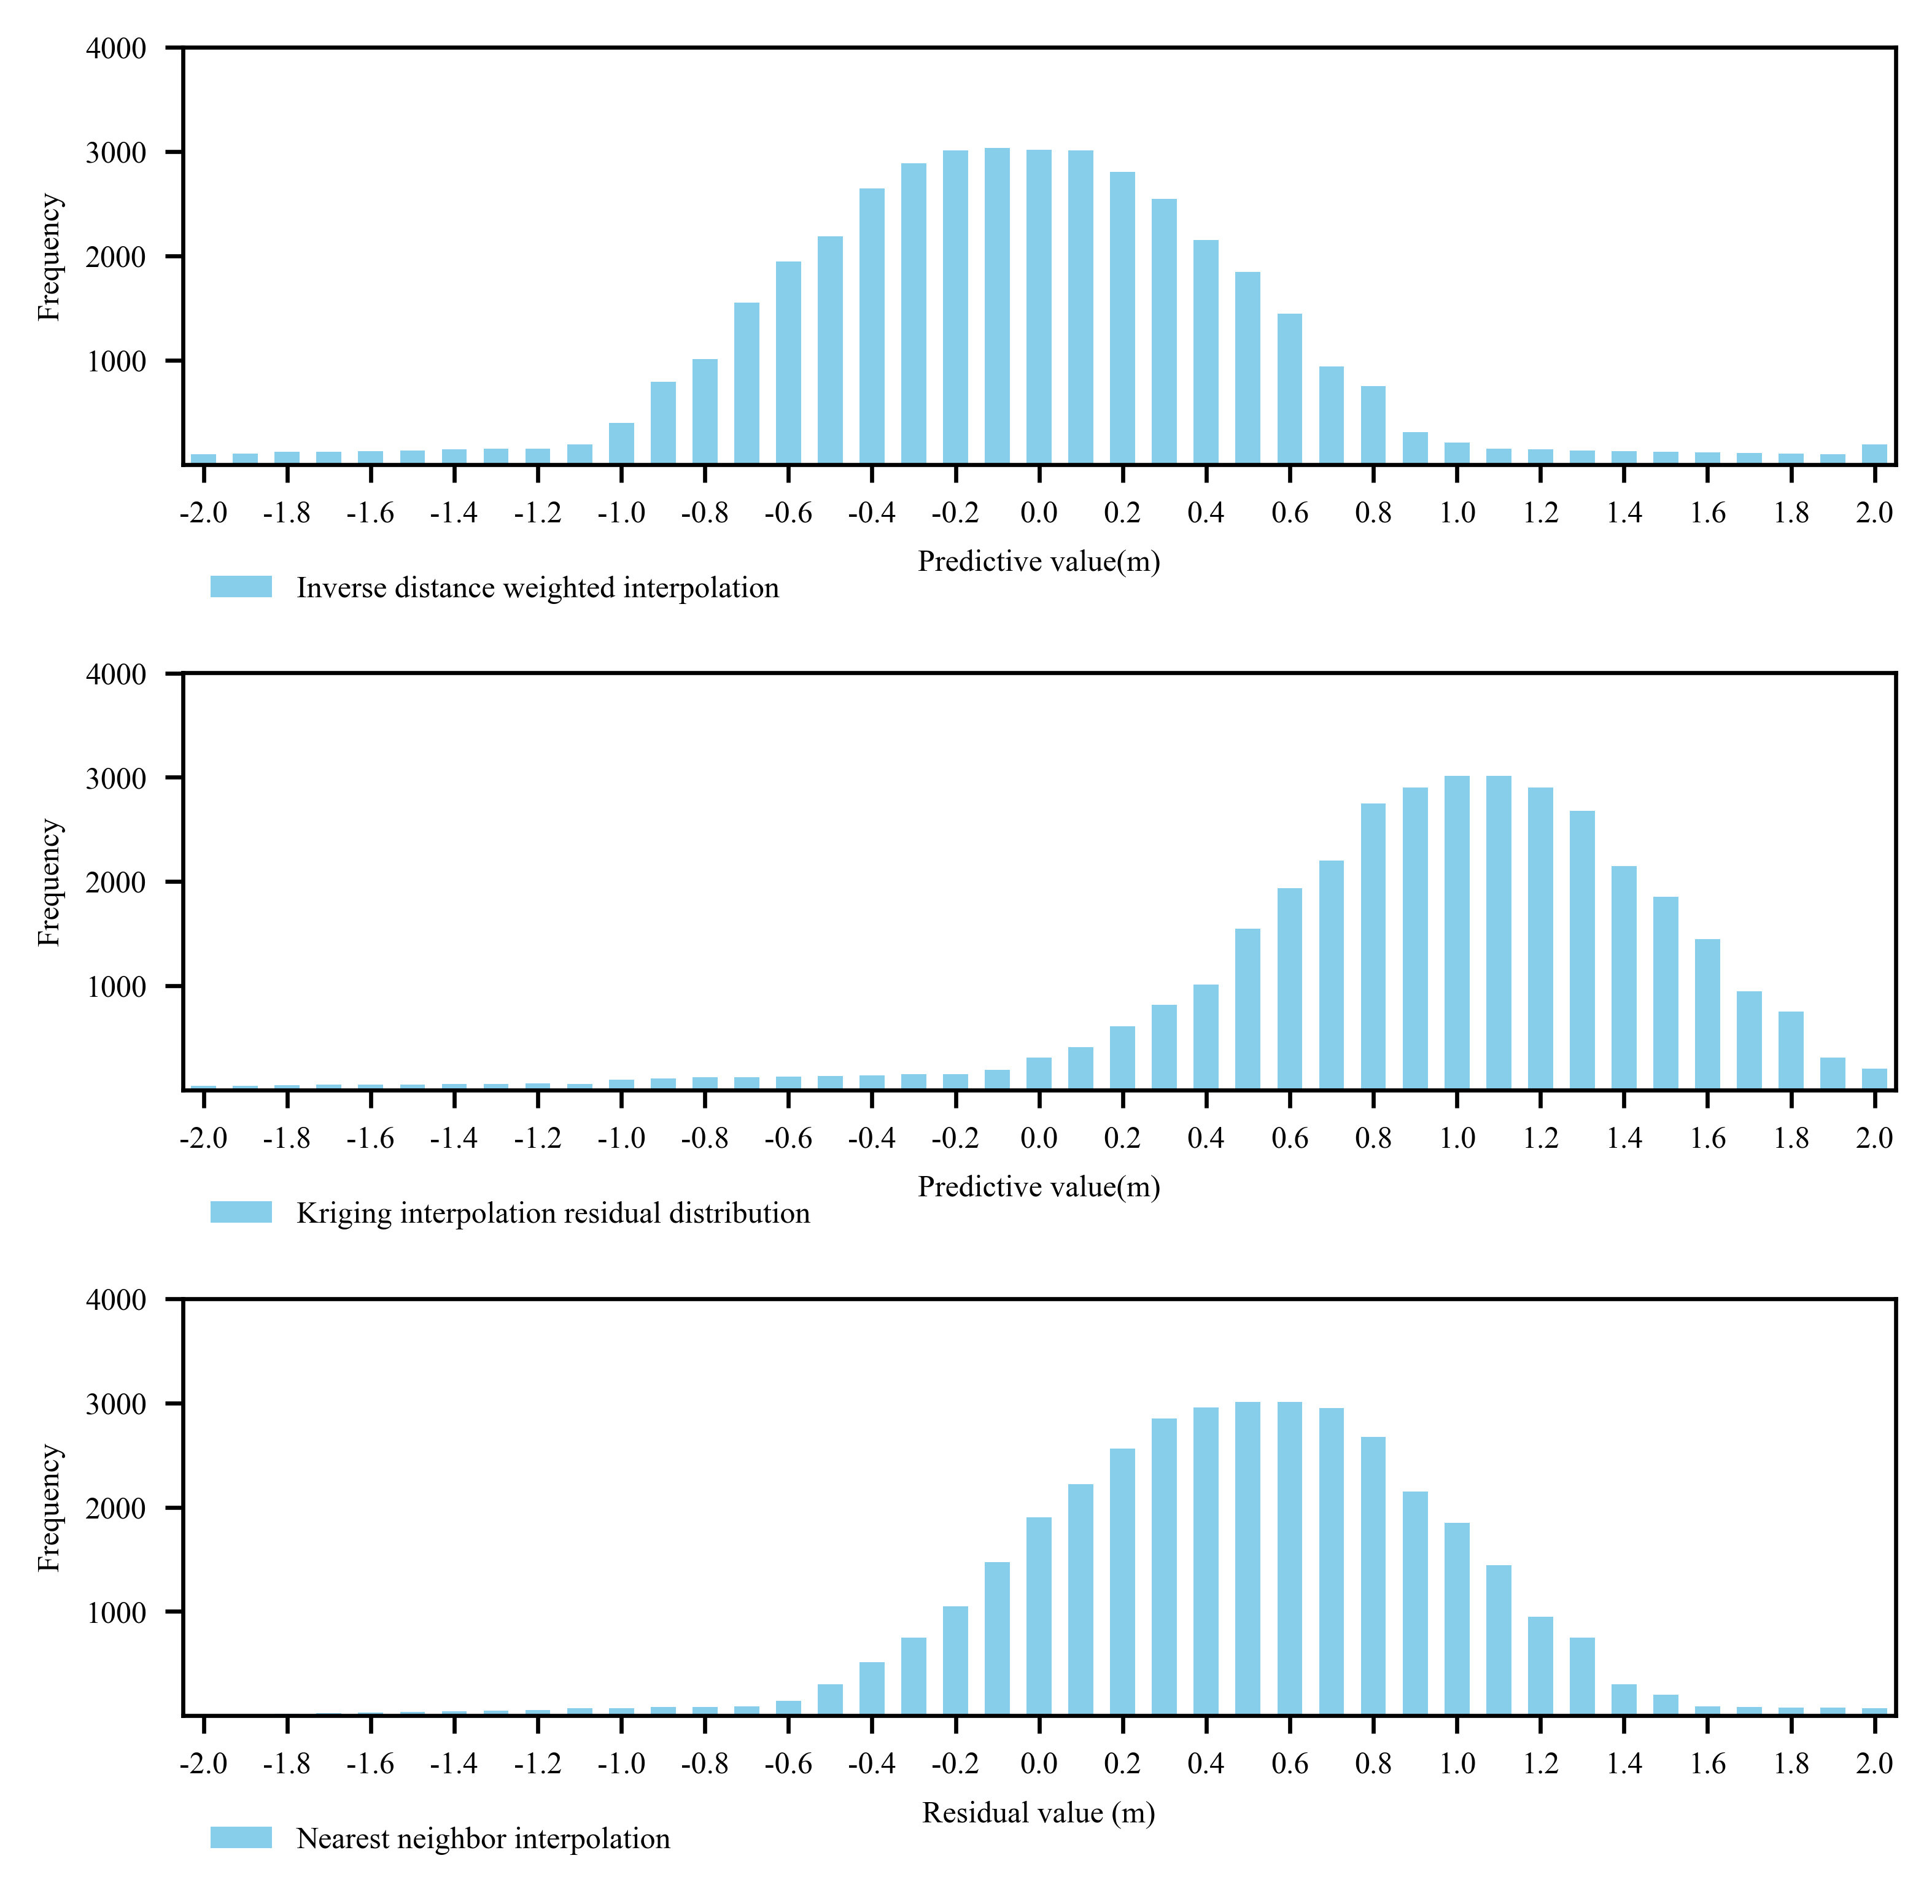

In [10]:
import csv
import numpy as np
import random
import matplotlib.pyplot as plt

# 字体格式
config = {
    "font.family":'serif',
    "font.size": 6,
    'font.style':'normal',
    'font.weight':'normal',
    "mathtext.fontset":'cm',
    "font.serif": ['Times New Roman'],
    "axes.unicode_minus": False,
}
plt.rcParams.update(config)

# 残差的范围
limit = np.array([-2,-1.9,-1.8,-1.7,-1.6,-1.5,-1.4,-1.3,-1.2,-1.1,
                  -1.0,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0,
                  0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,
                  1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0])
# 加载数据绘制直方图
# histogram_of_inverse_residuals
i_data = []
filename = 'data/histogram_of_inverse_residuals.csv'
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    for row in reader:
        i_data.append(float(row[0]))
i_data.sort()
i_data = np.array(i_data)
# histogram_of_kriging_residuals
k_data = []
filename = 'data/histogram_of_kriging_residuals.csv'
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    for row in reader:
        k_data.append(float(row[0]))
k_data.sort()
k_data = np.array(k_data)
# histogram_of_nearest_residuals
n_data = []
filename = 'data/histogram_of_nearest_residuals.csv'
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    for row in reader:
        n_data.append(float(row[0]))
n_data.sort()
n_data = np.array(n_data)

# 统计数量
i_freq = np.zeros(limit.size)
k_freq = np.zeros(limit.size)
n_freq = np.zeros(limit.size)
# 判定值的范围并计数
for i in range(limit.size):
    i_freq[i] = np.array((np.where((i_data < limit[i]+0.05) & (i_data >= limit[i]-0.05)))[0].size)
    k_freq[i] = np.array((np.where((k_data < limit[i]+0.05) & (k_data >= limit[i]-0.05)))[0].size)
    n_freq[i] = np.array((np.where((n_data < limit[i]+0.05) & (n_data >= limit[i]-0.05)))[0].size)

# print(i_freq, k_freq, n_freq)

# 根据MAE调整数量freq
MAE_i = abs(limit).dot(i_freq.T)/sum(i_freq)
MAE_k = abs(limit).dot(k_freq.T)/sum(k_freq)
MAE_n = abs(limit).dot(n_freq.T)/sum(n_freq)
#print(MAE_i, MAE_k, MAE_n)

RMSE_i = math.sqrt((limit*limit).dot(i_freq.T)/sum(i_freq))
RMSE_k = math.sqrt((limit*limit).dot(k_freq.T)/sum(k_freq))
RMSE_n = math.sqrt((limit*limit).dot(n_freq.T)/sum(n_freq))
#print(RMSE_i, RMSE_k, RMSE_n)

# 计算各个方法的偏差
# 设置横轴轴比例，dpi每个间隔的像素点大小
plt.figure(figsize=(6, 6), dpi=600)
# 第一个图
ax = plt.subplot(311)
ax.bar(x=limit, height=i_freq, label='Inverse distance weighted interpolation', color="#87CEEB", width=0.06, align="center")
# 添加x轴和y轴标签
plt.xlabel('Predictive value(m)')
plt.ylabel('Frequency')
x_major_locator = MultipleLocator(0.2)
y_major_locator = MultipleLocator(1000)
#ax为两条坐标轴的实例
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.axis([-2.05,2.05,1, 4001])
plt.legend(loc=3, bbox_to_anchor=(0,-0.4), frameon=False)
# 第二个图
ax = plt.subplot(312)
ax.bar(x=limit, height=k_freq, label='Kriging interpolation residual distribution', color="#87CEEB", width=0.06, align="center")
# 添加x轴和y轴标签
plt.xlabel('Predictive value(m)')
plt.ylabel('Frequency')
x_major_locator = MultipleLocator(0.2)
y_major_locator = MultipleLocator(1000)
#ax为两条坐标轴的实例
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.axis([-2.05,2.05,1, 4001])
plt.legend(loc=3, bbox_to_anchor=(0,-0.4), frameon=False)
# 第三个图
ax = plt.subplot(313)
ax.bar(x=limit, height=n_freq, label='Nearest neighbor interpolation', color="#87CEEB", width=0.06, align="center")
# 添加x轴和y轴标签
plt.xlabel('Residual value (m)')
plt.ylabel('Frequency')
x_major_locator = MultipleLocator(0.2)
y_major_locator = MultipleLocator(1000)
#ax为两条坐标轴的实例
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.axis([-2.05,2.05,1, 4001])
plt.legend(loc=3, bbox_to_anchor=(0,-0.4), frameon=False)
# 调整间隔
plt.subplots_adjust(hspace = 0.5)
# 显示图形
plt.show()


**Results of search points in the plain experimental area**

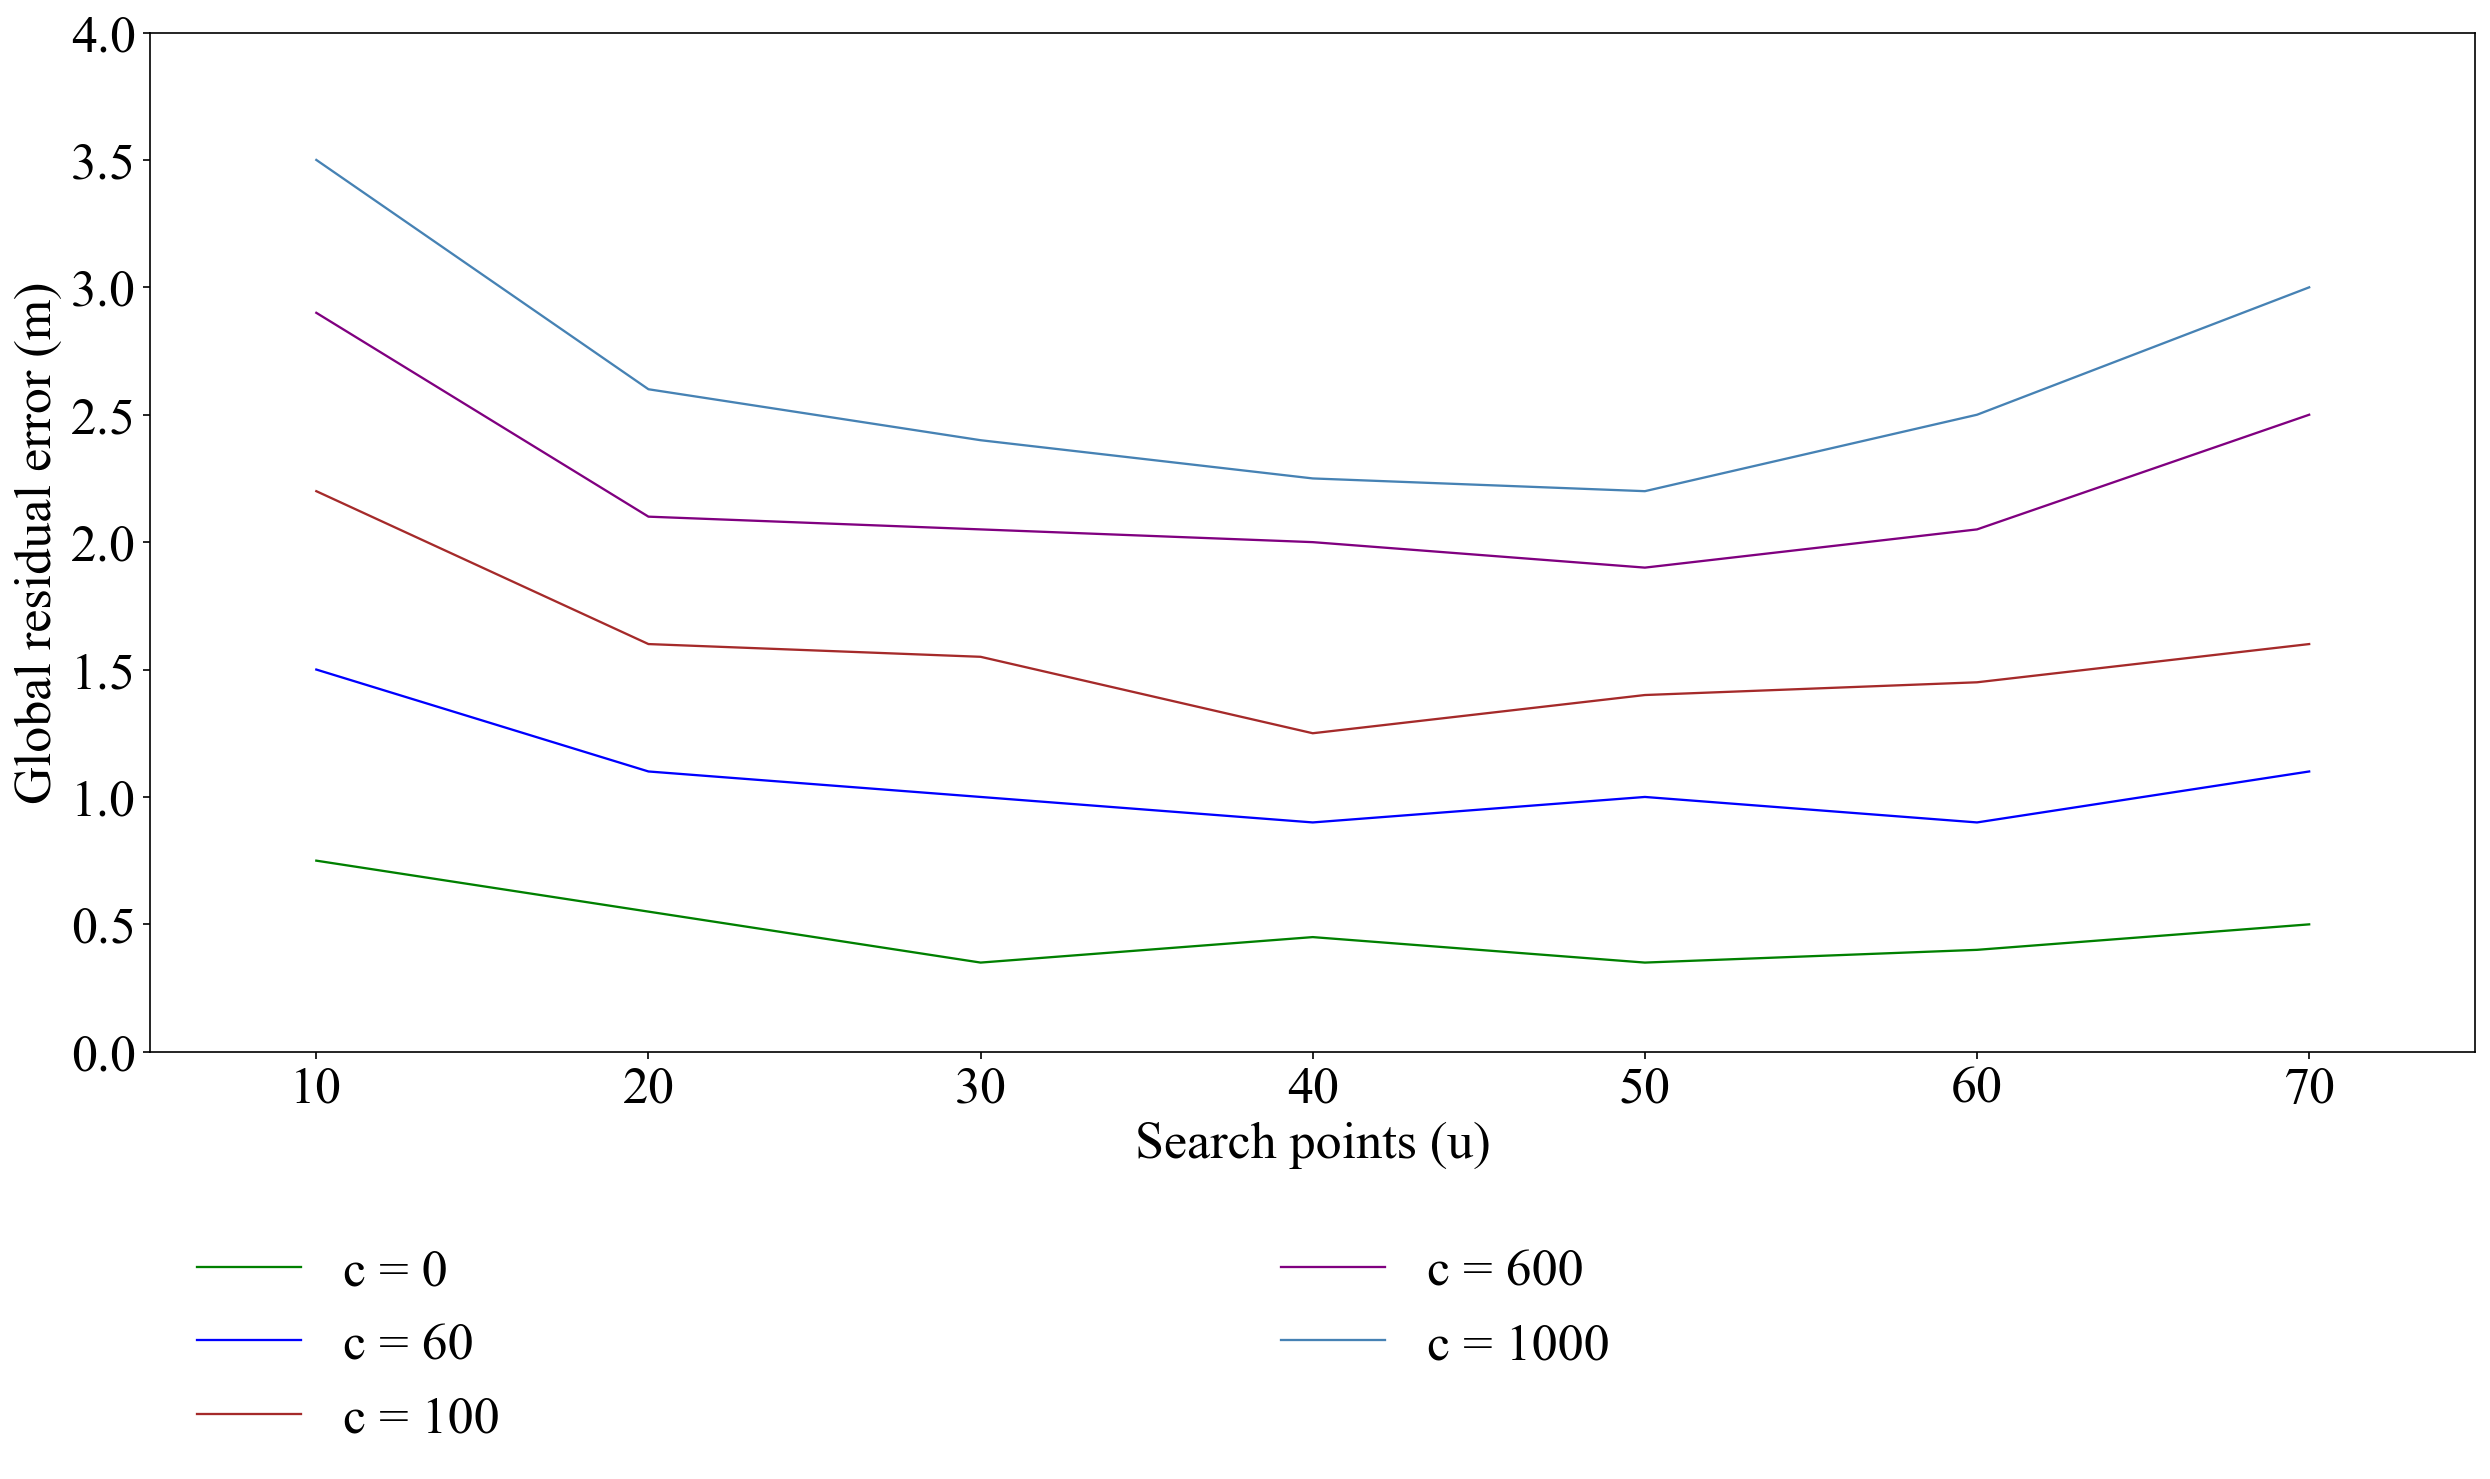

In [11]:
import csv
from matplotlib import pyplot as plt
from matplotlib.pyplot import MultipleLocator

# 字体格式
config = {
    "font.family":'serif',
    "font.size": 25,
    'font.style':'normal',
    'font.weight':'normal',
    "mathtext.fontset":'cm',
    "font.serif": ['Times New Roman'],
    "axes.unicode_minus": False,
}
plt.rcParams.update(config)

filename = 'data/results_if_search_points_in_plain.csv'
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    SP = []
    GRE1 = []
    GRE2 = []
    GRE3 = []
    GRE4 = []
    GRE5 = []
    # reader对象从其当前所在的位置继续读取CSV文件，每次都自动返回当前所处位置的下一行
    for row in reader:
        SP.append(float(row[0]))
        GRE1.append(float(row[1]))
        GRE2.append(float(row[2]))
        GRE3.append(float(row[3]))
        GRE4.append(float(row[4]))
        GRE5.append(float(row[5]))

plt.figure(figsize=(20, 9), dpi=150)
x_major_locator=MultipleLocator(10)
y_major_locator=MultipleLocator(0.5)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.xlabel('Search points (u)')
plt.ylabel('Global residual error (m)')
plt.axis([5,75,0,4])
plt.plot(SP, GRE1, label='c = 0', linewidth=1.1, color='green')
plt.plot(SP, GRE2, label='c = 60', linewidth=1.1, color='blue')
plt.plot(SP, GRE3, label='c = 100', linewidth=1.1, color='brown')
plt.plot(SP, GRE4, label='c = 600', linewidth=1.1, color='purple')
plt.plot(SP, GRE5, label='c = 1000', linewidth=1.1, color='steelblue')
plt.legend(loc=3,bbox_to_anchor=(0,-0.43),ncol=2,columnspacing=15,frameon=False)
plt.show()

**Results of search points in the hilly experimental area**

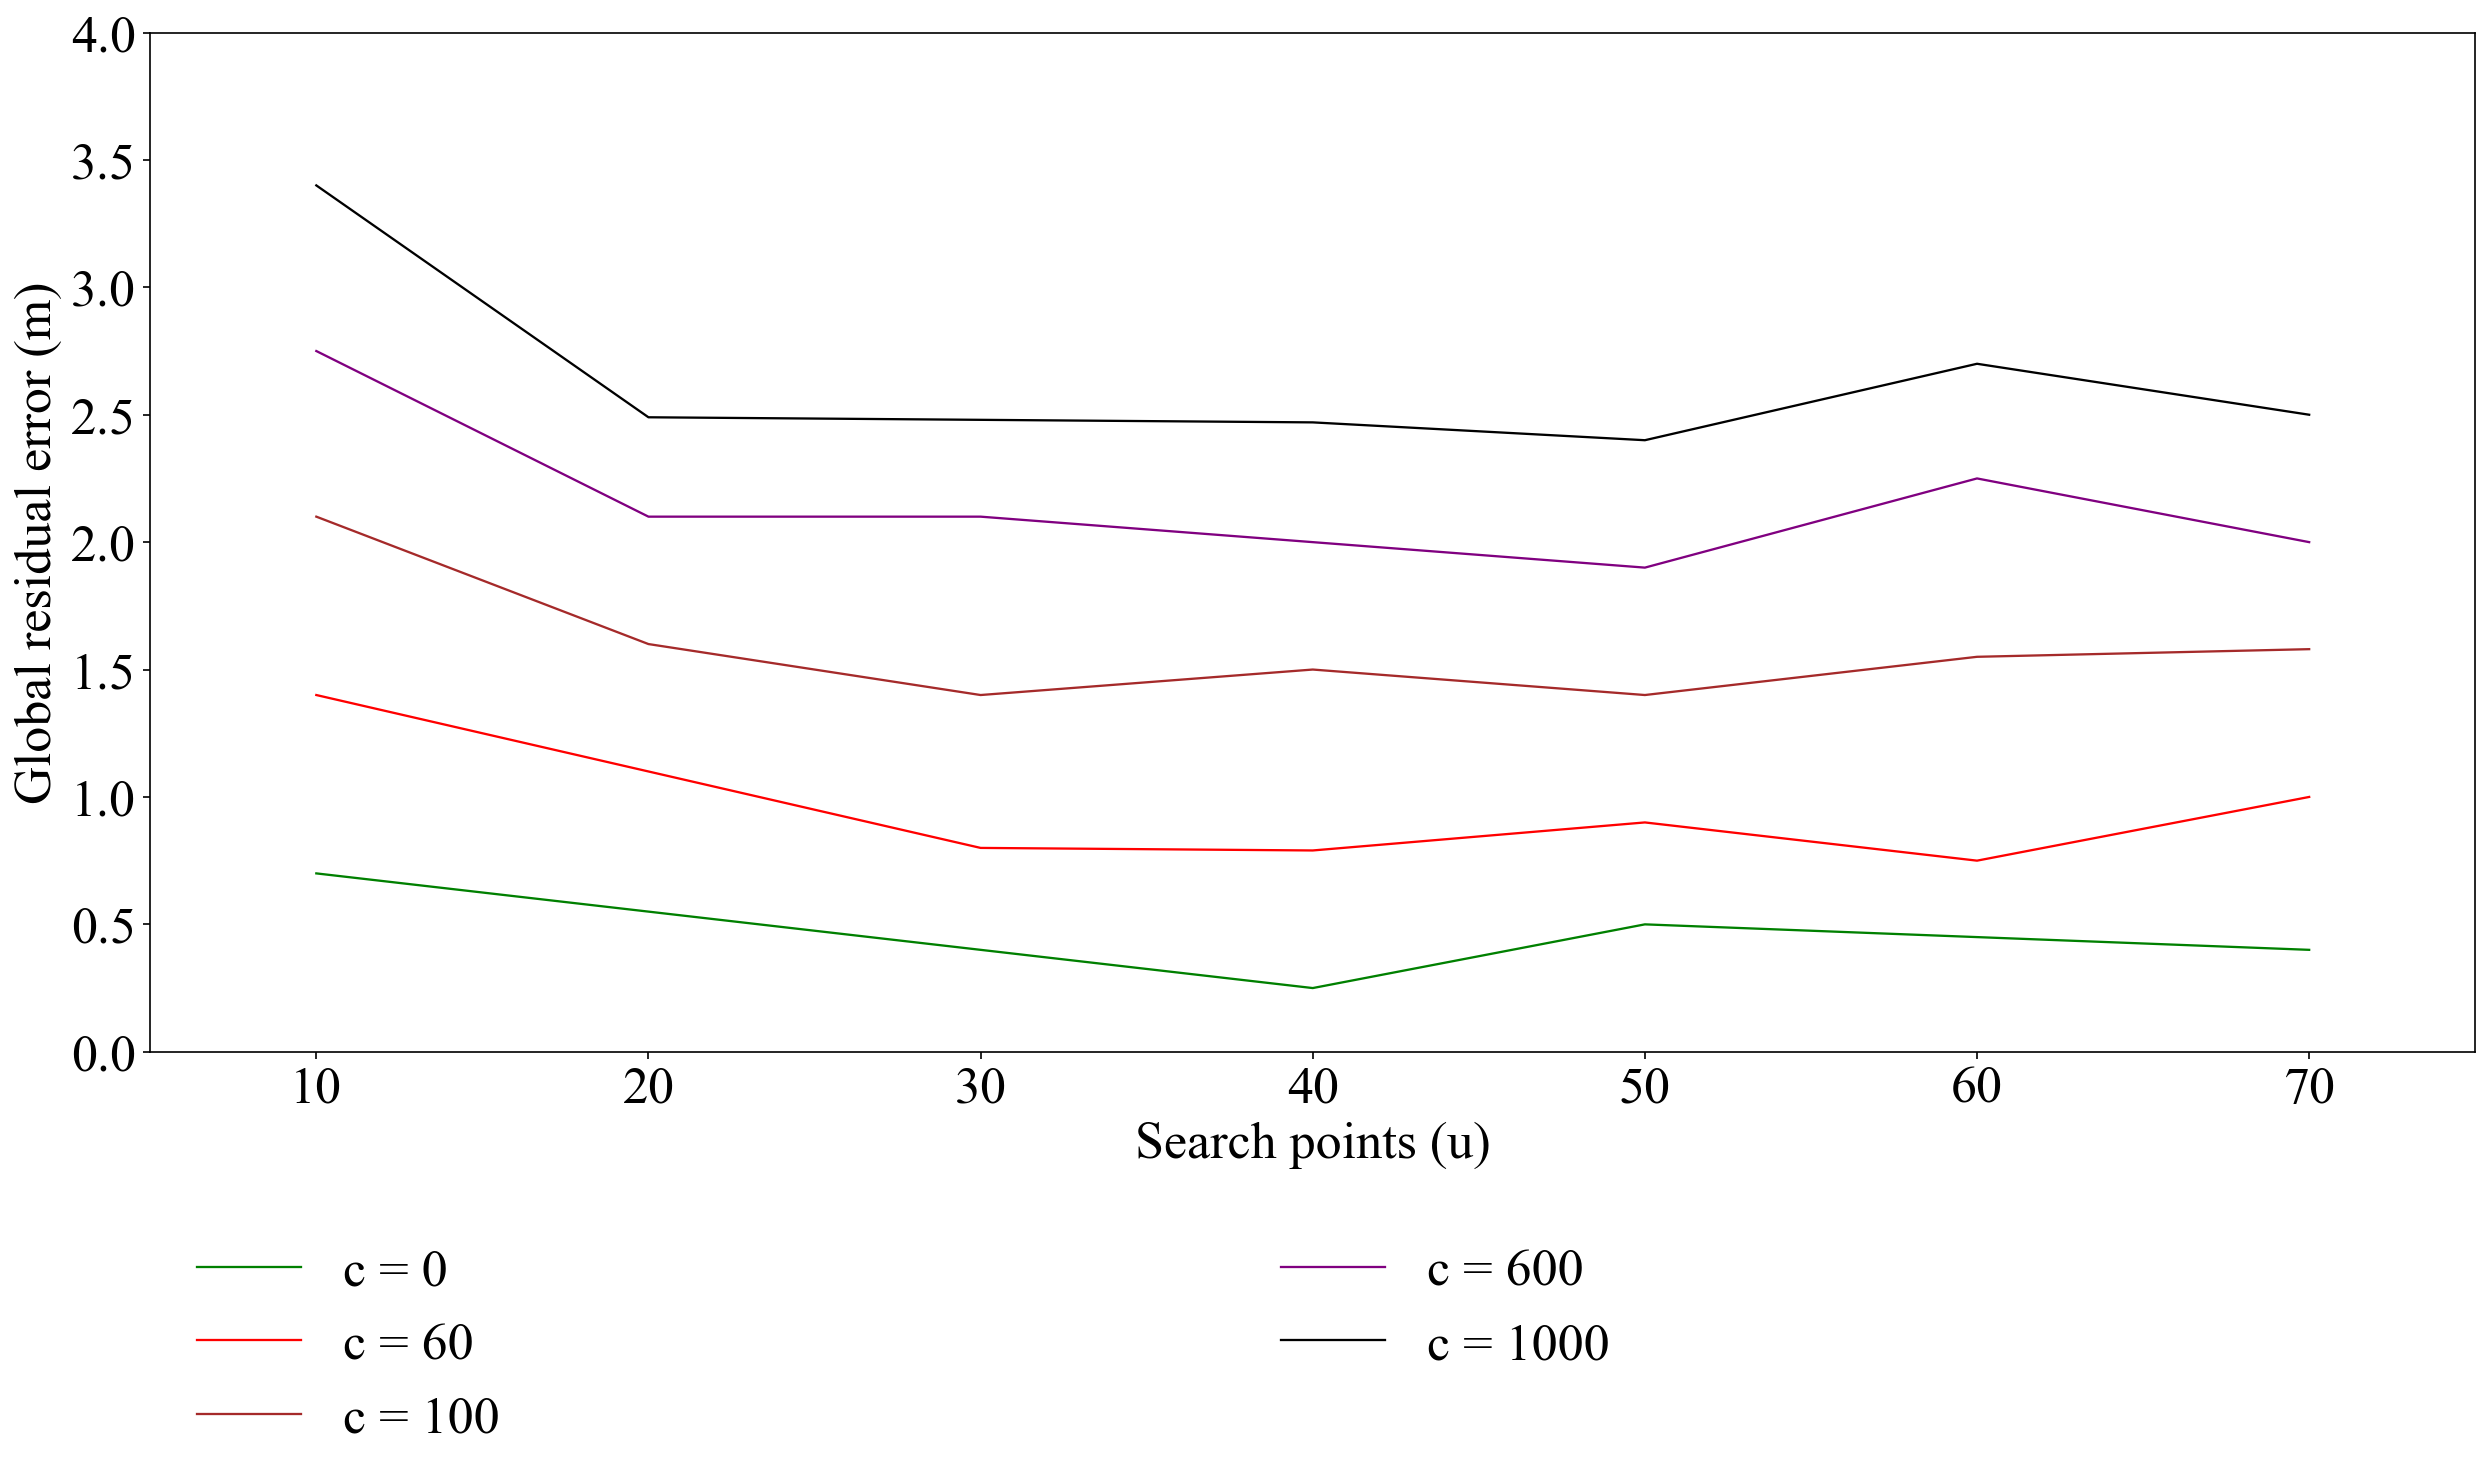

In [12]:
import csv
from matplotlib import pyplot as plt
from matplotlib.pyplot import MultipleLocator

# 字体格式
config = {
    "font.family":'serif',
    "font.size": 25,
    'font.style':'normal',
    'font.weight':'normal',
    "mathtext.fontset":'cm',
    "font.serif": ['Times New Roman'],
    "axes.unicode_minus": False,
}
plt.rcParams.update(config)

filename = 'data/results_if_search_points_in_hilly.csv'
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    SP = []
    GRE1 = []
    GRE2 = []
    GRE3 = []
    GRE4 = []
    GRE5 = []
    # reader对象从其当前所在的位置继续读取CSV文件，每次都自动返回当前所处位置的下一行
    for row in reader:
        SP.append(float(row[0]))
        GRE1.append(float(row[1]))
        GRE2.append(float(row[2]))
        GRE3.append(float(row[3]))
        GRE4.append(float(row[4]))
        GRE5.append(float(row[5]))

plt.figure(figsize=(20, 9), dpi=150)
x_major_locator=MultipleLocator(10)
y_major_locator=MultipleLocator(0.5)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.xlabel('Search points (u)')
plt.ylabel('Global residual error (m)')
plt.axis([5,75,0,4])
plt.plot(SP, GRE1, label='c = 0', linewidth=1.1, color='green')
plt.plot(SP, GRE2, label='c = 60', linewidth=1.1, color='red')
plt.plot(SP, GRE3, label='c = 100', linewidth=1.1, color='brown')
plt.plot(SP, GRE4, label='c = 600', linewidth=1.1, color='purple')
plt.plot(SP, GRE5, label='c = 1000', linewidth=1.1, color='black')
plt.legend(loc=3,bbox_to_anchor=(0,-0.43),ncol=2,columnspacing=15,frameon=False)
plt.show()

**DEM analysis results of low mountain experimental area**

D:\Anaconda3\envs\dplearn_3.6\lib\site-packages\ipykernel_launcher.py:86: UserWarning: FixedFormatter should only be used together with FixedLocator


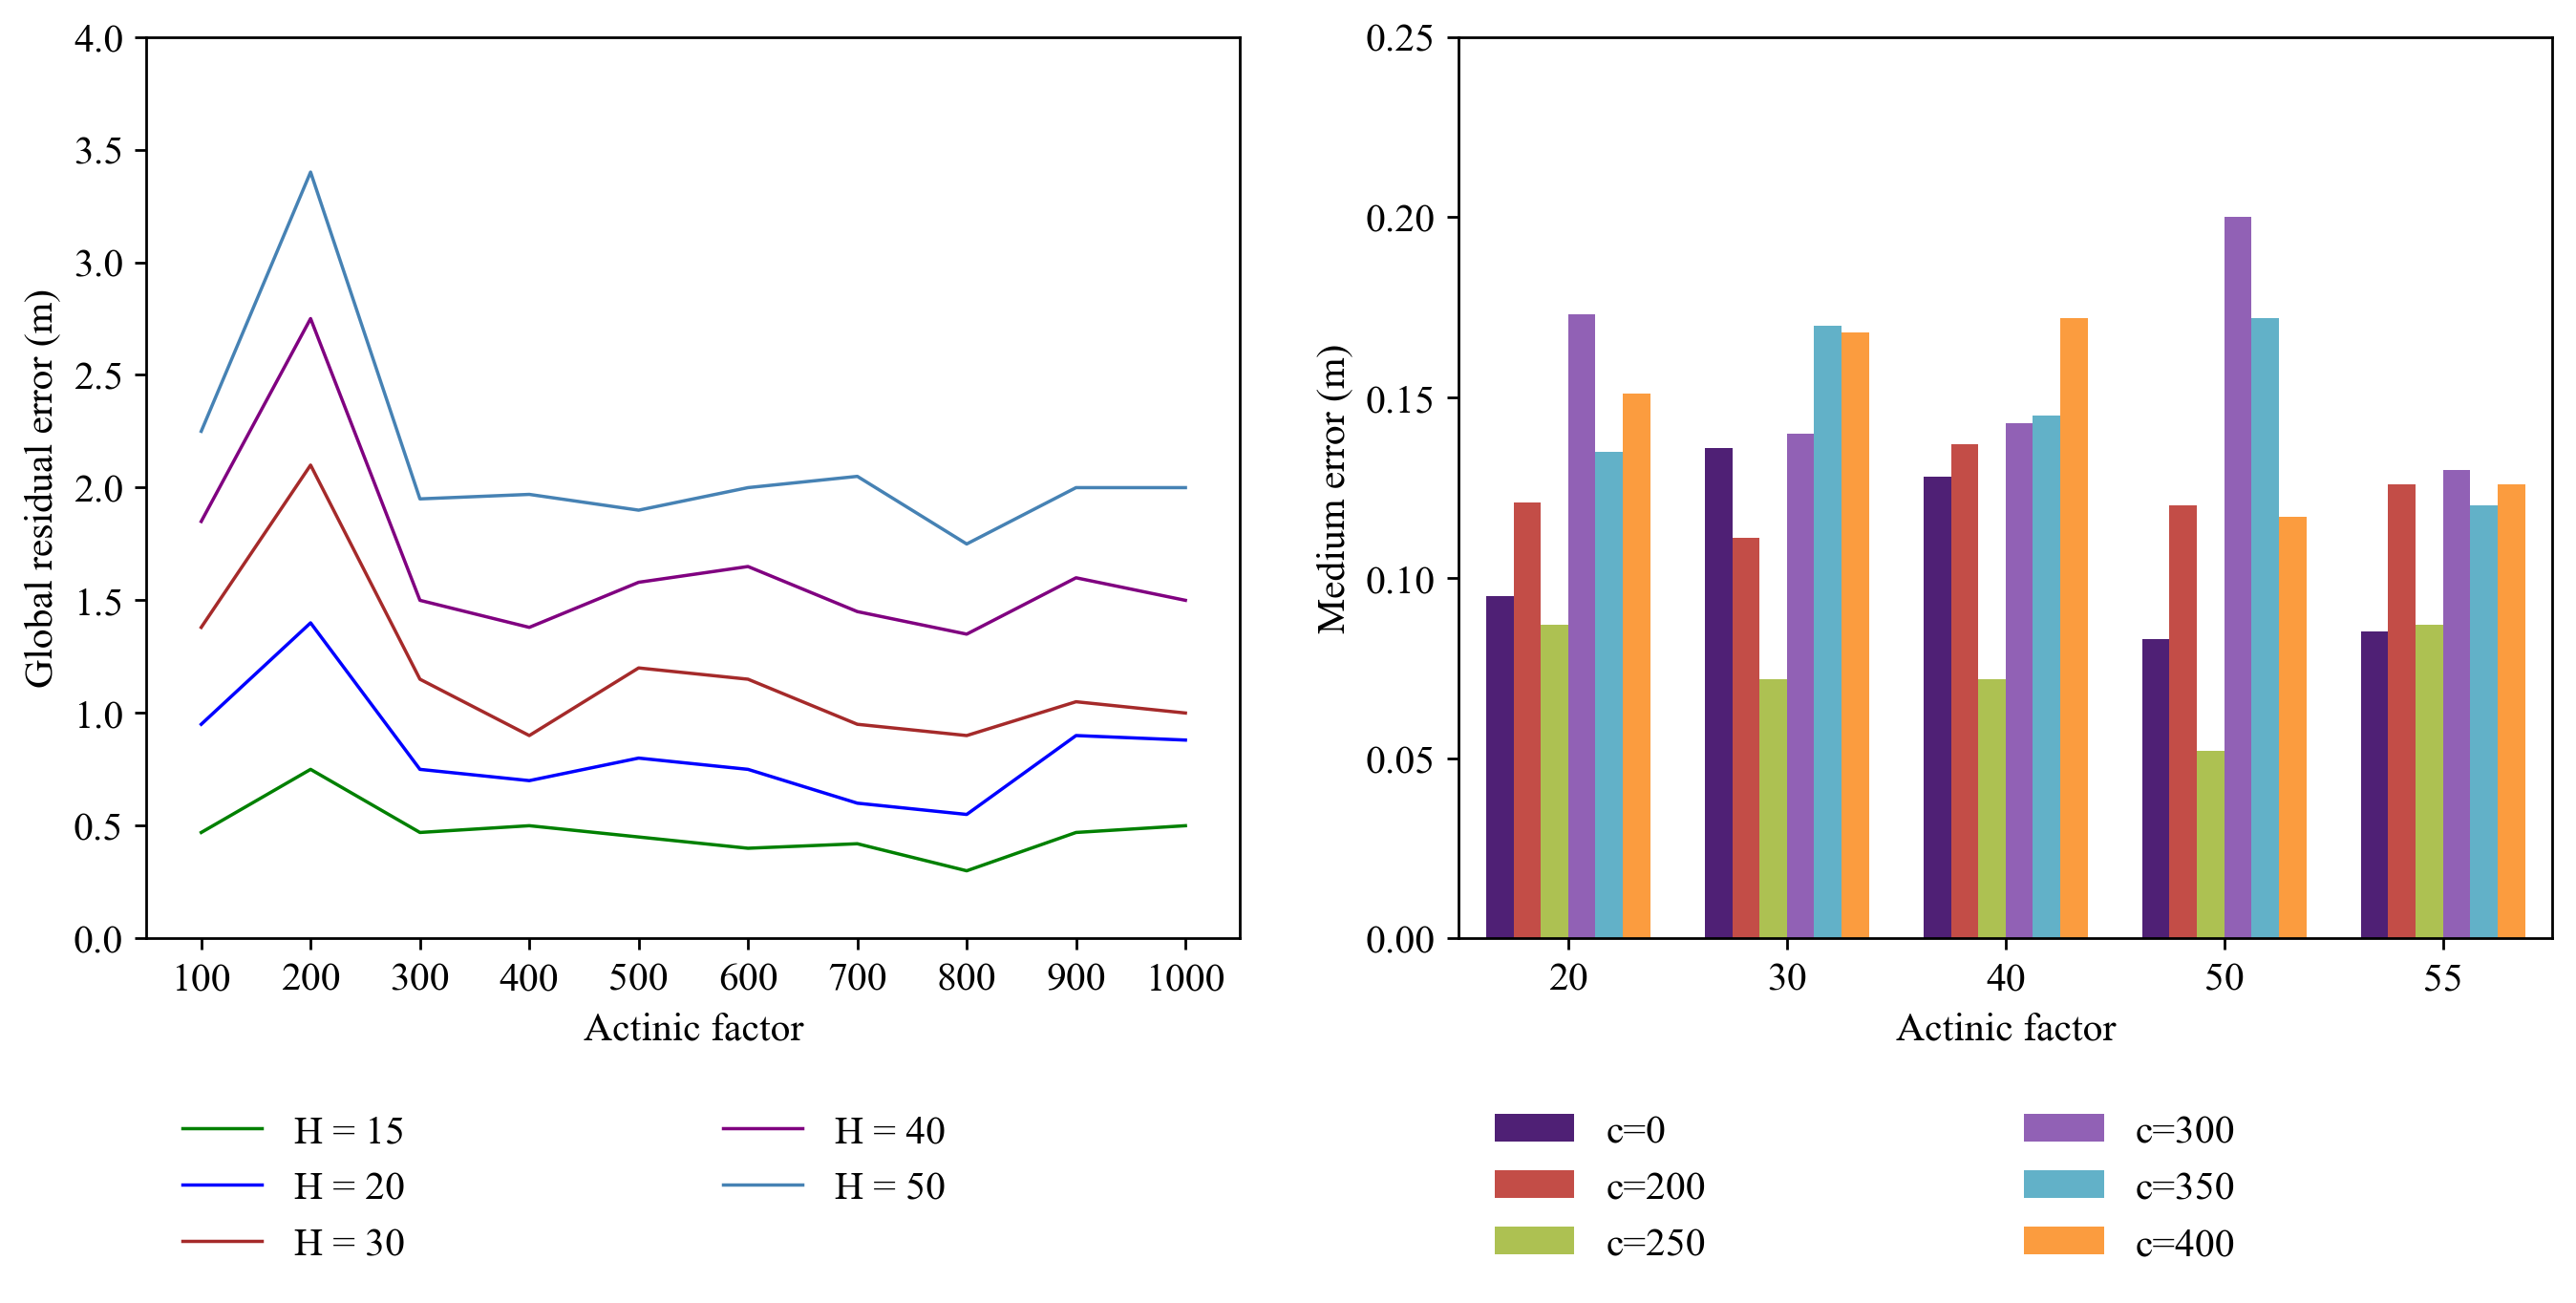

In [13]:
import numpy as np
import math
import matplotlib.pyplot as plt 
from matplotlib.pyplot import MultipleLocator

# 字体格式
config = {
    "font.family":'serif',
    "font.size": 12,
    'font.style':'normal',
    'font.weight':'normal',
    "mathtext.fontset":'cm',
    "font.serif": ['Times New Roman'],
    "axes.unicode_minus": False,
}
plt.rcParams.update(config)

# 设置横轴轴比例，dpi每个间隔的像素点大小
plt.figure(figsize=(13, 5), dpi=250)
# 第一个图
plt.subplot(121)
filename = 'data/DEM_analysis_result_gre.csv'
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    AF = []
    GRE1 = []
    GRE2 = []
    GRE3 = []
    GRE4 = []
    GRE5 = []
    for row in reader:
        AF.append(float(row[0]))
        GRE1.append(float(row[1]))
        GRE2.append(float(row[2]))
        GRE3.append(float(row[3]))
        GRE4.append(float(row[4]))
        GRE5.append(float(row[5]))
# 设置间隔
x_major_locator=MultipleLocator(100)
y_major_locator=MultipleLocator(0.5)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.xlabel('Actinic factor') 
plt.ylabel('Global residual error (m)') 
plt.axis([50,1050,0,4])
# 加载折线图
plt.plot(AF, GRE1, label='H = 15', linewidth=1, color='green')
plt.plot(AF, GRE2, label='H = 20', linewidth=1, color='blue')
plt.plot(AF, GRE3, label='H = 30', linewidth=1, color='brown')
plt.plot(AF, GRE4, label='H = 40', linewidth=1, color='purple')
plt.plot(AF, GRE5, label='H = 50', linewidth=1, color='steelblue')
# 设置图例
plt.legend(loc=3,bbox_to_anchor=(0,-0.4),ncol=2,columnspacing=8,frameon=False)
# 第二个图
plt.subplot(122)
filename = 'data/DEM_analysis_result_me.csv'
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    af_list = []
    c_0 = []
    c_200 = []
    c_250 = []
    c_300 = []
    c_350 = []
    c_400 = []
    for row in reader:
        af_list.append(int(row[0]))
        c_0.append(float(row[1]))
        c_200.append(float(row[2]))
        c_250.append(float(row[3]))
        c_300.append(float(row[4]))
        c_350.append(float(row[5]))
        c_400.append(float(row[6]))
# 设置单位间隔
x_major_locator=MultipleLocator(10)
y_major_locator=MultipleLocator(0.05)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.xlabel('Actinic factor') 
plt.ylabel('Medium error (m)') 
ax.axis([15,65,0,0.25])
ax.set_xticklabels([15,20,30,40,50,55])
# 加载柱状图数据
total_width, n = 10, 8
width = total_width / n
span = 10
x = np.zeros(len(af_list))
for i in range(len(af_list)):
    x[i] = 15 + span*i + width*1.5
a = ax.bar(x, c_0, width=width, label='c=0', fc='#4F2075')

for i in range(len(af_list)):
    x[i] = 15 + span*i + width*2.5
b = ax.bar(x, c_200, width=width, label='c=200', fc='#C34D47')

for i in range(len(af_list)):
    x[i] = 15 + span*i + width*3.5
c = ax.bar(x, c_250, width=width, label='c=250', fc='#ADC152')

for i in range(len(af_list)):
    x[i] = 15 + span*i + width*4.5
d = ax.bar(x, c_300, width=width, label='c=300', fc='#9161B5')

for i in range(len(af_list)):
    x[i] = 15 + span*i + width*5.5
e = ax.bar(x, c_350, width=width, label='c=350', fc='#62B1C8')

for i in range(len(af_list)):
    x[i] = 15 + span*i + width*6.5
f = ax.bar(x, c_400, width=width, label='c=400', fc='#FB9C3F')
# 设置图例
plt.legend(loc=3,bbox_to_anchor=(0,-0.4),ncol=2,columnspacing=8,frameon=False)
plt.show() 